## Modelling

The goal of the section is to develop a model with best model evaluation parameters. Numerous algorithms will be tested followed by hyperparameter tuning to obtain a best performing model.  

## Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy

import warnings
warnings.filterwarnings(action='ignore')

## 1) Baseline Model 

For the classification problem, baseline model can be considered as a model with area under ROC curve equal to 0.5. Here we consider a slightly higher predictive model, Logistic regression model as a baseline model considering the data from the main dataset: Application Train.


In [ ]:
# Loading datasets: df contains data from Application_train dataset
df = pd.read_csv('submission/cleaned_df_application_train_excluding 0.98 corr.csv')
df.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_12_1,FLAG_DOCUMENT_13_1,FLAG_DOCUMENT_14_1,FLAG_DOCUMENT_15_1,FLAG_DOCUMENT_16_1,FLAG_DOCUMENT_17_1,FLAG_DOCUMENT_18_1,FLAG_DOCUMENT_19_1,FLAG_DOCUMENT_20_1,FLAG_DOCUMENT_21_1
0,100002,1,202500.0,406597.5,24700.5,0.018801,9461,637,3648.0,2120,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,270000.0,1293502.5,35698.5,0.003541,16765,1188,1186.0,291,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,67500.0,135000.0,6750.0,0.010032,19046,225,4260.0,2531,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,0.008019,19005,3039,9833.0,2437,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,0.028663,19932,3038,4311.0,3458,...,0,0,0,0,0,0,0,0,0,0


### Test train split and scaling

In [ ]:
# Variable separation: Features and Target
X=df.drop(['TARGET','SK_ID_CURR'], axis=1).values
y=df['TARGET'].values

# Train-Test Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Data Scaling using MinMax Scalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Baseline Model: Logistic Regression

Test Data Metrics:
[[56028   473]
 [ 4596   347]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56501
           1       0.42      0.07      0.12      4943

    accuracy                           0.92     61444
   macro avg       0.67      0.53      0.54     61444
weighted avg       0.88      0.92      0.89     61444



Train Data Metrics:
[[224129   1783]
 [ 18397   1463]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    225912
           1       0.45      0.07      0.13     19860

    accuracy                           0.92    245772
   macro avg       0.69      0.53      0.54    245772
weighted avg       0.89      0.92      0.89    245772



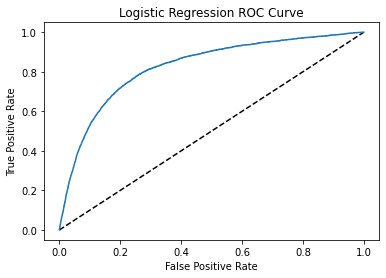



ROC_AUC Score:
roc_auc (test): 0.825
roc_auc (training): 0.823


In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Model evaluation matrices
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

#ROC_AUC Curve
from sklearn.metrics import roc_curve
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print('\n')
print('ROC_AUC Score:')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))



**Baseline Model:** Roc_AUC(TEST)=0.825, the recall for 0 is exceptionally high and that for 1 is extremely low.

# 2) Search for Best Model

### Data Overview



In [ ]:
#Loading dataset: df contains application_train and features extracted from additional datasets 
df = pd.read_csv('submission/cleaned_df_excluding 0.98 corr.csv')
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307216 entries, 0 to 307215
Data columns (total 563 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   SK_ID_CURR                                                   307216 non-null  int64  
 1   TARGET                                                       307216 non-null  int64  
 2   AMT_INCOME_TOTAL                                             307216 non-null  float64
 3   AMT_CREDIT                                                   307216 non-null  float64
 4   AMT_ANNUITY                                                  307216 non-null  float64
 5   REGION_POPULATION_RELATIVE                                   307216 non-null  float64
 6   DAYS_BIRTH                                                   307216 non-null  int64  
 7   DAYS_EMPLOYED                                                307

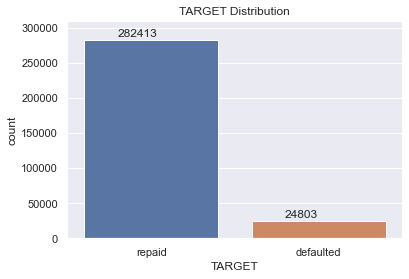

In [ ]:
#Targets
sns.set()
ax=sns.countplot(df['TARGET'])
plt.xticks([1,0],['defaulted', 'repaid'])
plt.ylim([0,310000])
plt.title('TARGET Distribution')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+5000))


In [ ]:
#checking for null values
df.isnull().values.any()

False

### Test train split and scaling

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR'], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### 2.1) Logistic Regression

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Model evaluation matrices
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print('\n')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))



Test Data Metrics:
[[55988   513]
 [ 4456   487]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56501
           1       0.49      0.10      0.16      4943

    accuracy                           0.92     61444
   macro avg       0.71      0.54      0.56     61444
weighted avg       0.89      0.92      0.89     61444



Train Data Metrics:
[[223982   1930]
 [ 17904   1956]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    225912
           1       0.50      0.10      0.16     19860

    accuracy                           0.92    245772
   macro avg       0.71      0.54      0.56    245772
weighted avg       0.89      0.92      0.89    245772



roc_auc (test): 0.833
roc_auc (training): 0.831


In [ ]:
#Feature importance LR
feature_importances_LR=abs(classifier_LR.coef_)[0]
features= df.drop(['TARGET','SK_ID_CURR'], axis=1).columns
feature_importances_LR=pd.DataFrame(list(zip(features,feature_importances_LR/max(feature_importances_LR)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LR.head(50)

,features,importance
9,EXT_SOURCE_1,100.000000
11,EXT_SOURCE_3,55.498228
2,AMT_ANNUITY,38.567993
248,count_bureau_CREDIT_ACTIVE_type_Active,30.902941
10,EXT_SOURCE_2,29.824854
526,POS_CASH_CNT_INSTALMENT_FUTURE_sum,28.093415
482,installments_payments_NUM_INSTALMENT_VERSION_std,27.684831
39,DEF_30_CNT_SOCIAL_CIRCLE,27.436105
40,DEF_60_CNT_SOCIAL_CIRCLE,26.657132
485,installments_payments_NUM_INSTALMENT_NUMBER_me...,24.949870


#### 2.1.1) Weighted LR

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0, class_weight={0:1,1:10})
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
y_pred_train=classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[45251 11250]
 [ 1262  3681]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     56501
           1       0.25      0.74      0.37      4943

    accuracy                           0.80     61444
   macro avg       0.61      0.77      0.62     61444
weighted avg       0.91      0.80      0.84     61444



Train Data Metrics:
[[180460  45452]
 [  5033  14827]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88    225912
           1       0.25      0.75      0.37     19860

    accuracy                           0.79    245772
   macro avg       0.61      0.77      0.62    245772
weighted avg       0.91      0.79      0.84    245772

roc_auc (training): 0.836
roc_auc (test): 0.836


##### 2.1.2) L1/L2 regularization LR

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:10}, penalty='l1')
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)
y_pred_train=classifier_LR.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[45324 11177]
 [ 1269  3674]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     56501
           1       0.25      0.74      0.37      4943

    accuracy                           0.80     61444
   macro avg       0.61      0.77      0.63     61444
weighted avg       0.91      0.80      0.84     61444



Train Data Metrics:
[[180880  45032]
 [  4992  14868]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88    225912
           1       0.25      0.75      0.37     19860

    accuracy                           0.80    245772
   macro avg       0.61      0.77      0.63    245772
weighted avg       0.91      0.80      0.84    245772

roc_auc (training): 0.838
roc_auc (test): 0.837


In [ ]:
feature_importances_LR=abs(classifier_LR.coef_)[0]
features= df.drop(['TARGET','SK_ID_CURR'], axis=1).columns
feature_importances_LR=pd.DataFrame(list(zip(features,feature_importances_LR/max(feature_importances_LR)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LR.head(50)

,features,importance
507,installments_payments_AMT_PAYMENT_min,100.000000
325,bureau_AMT_CREDIT_SUM_DEBT_var,57.261498
498,installments_payments_AMT_INSTALMENT_mean,52.038661
505,installments_payments_AMT_PAYMENT_mean,44.601572
488,installments_payments_NUM_INSTALMENT_NUMBER_sum,41.391647
490,installments_payments_NUM_INSTALMENT_NUMBER_var,37.339257
422,credit_card_balance_AMT_PAYMENT_CURRENT_sum,33.918660
305,bureau_AMT_CREDIT_MAX_OVERDUE_var,28.050238
323,bureau_AMT_CREDIT_SUM_DEBT_sum,27.925649
501,installments_payments_AMT_INSTALMENT_min,27.168568


##### 2.1.2) LR with elsticnet regularization

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='saga', random_state = 0, class_weight={0:1,1:10}, penalty='elasticnet', l1_ratio=0.5)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)
y_pred_train=classifier_LR.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[43229 13272]
 [ 1457  3486]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.85     56501
           1       0.21      0.71      0.32      4943

    accuracy                           0.76     61444
   macro avg       0.59      0.74      0.59     61444
weighted avg       0.91      0.76      0.81     61444



Train Data Metrics:
[[172936  52976]
 [  5872  13988]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.85    225912
           1       0.21      0.70      0.32     19860

    accuracy                           0.76    245772
   macro avg       0.59      0.73      0.59    245772
weighted avg       0.91      0.76      0.81    245772

roc_auc (training): 0.803
roc_auc (test): 0.805


### 2.2) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(random_state = 0)
classifier_DT.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_DT.predict(X_test)
y_pred_train=classifier_DT.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_DT.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[54901  1600]
 [ 1345  3598]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     56501
           1       0.69      0.73      0.71      4943

    accuracy                           0.95     61444
   macro avg       0.83      0.85      0.84     61444
weighted avg       0.95      0.95      0.95     61444



Train Data Metrics:
[[225912      0]
 [     0  19860]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225912
           1       1.00      1.00      1.00     19860

    accuracy                           1.00    245772
   macro avg       1.00      1.00      1.00    245772
weighted avg       1.00      1.00      1.00    245772

roc_auc (training): 1.000
roc_auc (test): 0.850


### 2.3) Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF=RandomForestClassifier(random_state=0)

classifier_RF.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier_RF.predict(X_test)
y_pred_train=classifier_RF.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_RF.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[56493     8]
 [ 3481  1462]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     56501
           1       0.99      0.30      0.46      4943

    accuracy                           0.94     61444
   macro avg       0.97      0.65      0.71     61444
weighted avg       0.95      0.94      0.93     61444



Train Data Metrics:
[[225912      0]
 [     4  19856]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225912
           1       1.00      1.00      1.00     19860

    accuracy                           1.00    245772
   macro avg       1.00      1.00      1.00    245772
weighted avg       1.00      1.00      1.00    245772

roc_auc (training): 1.000
roc_auc (test): 0.942


In [ ]:
#Feature importance RF
feature_importance_RF = classifier_RF.feature_importances_
features= df.drop(['TARGET','SK_ID_CURR'], axis=1).columns
feature_importances_RF=pd.DataFrame(list(zip(features,feature_importance_RF/max(feature_importance_RF)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_RF.head(50)


,features,importance
9,EXT_SOURCE_1,100.000000
11,EXT_SOURCE_3,31.719462
10,EXT_SOURCE_2,9.409474
4,DAYS_BIRTH,8.475664
342,bureau_DAYS_CREDIT_UPDATE_max,4.819904
292,bureau_DAYS_CREDIT_ENDDATE_sum,4.796913
278,bureau_DAYS_CREDIT_min,4.470546
275,bureau_DAYS_CREDIT_mean,4.343458
276,bureau_DAYS_CREDIT_median,4.239846
312,bureau_AMT_CREDIT_SUM_mean,4.038198


#### 2.3.1) Weighted RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF=RandomForestClassifier(random_state=0, class_weight={0:1,1:10})

classifier_RF.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier_RF.predict(X_test)
y_pred_train=classifier_RF.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_RF.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[56491    10]
 [ 3788  1155]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     56501
           1       0.99      0.23      0.38      4943

    accuracy                           0.94     61444
   macro avg       0.96      0.62      0.67     61444
weighted avg       0.94      0.94      0.92     61444



Train Data Metrics:
[[225912      0]
 [     4  19856]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225912
           1       1.00      1.00      1.00     19860

    accuracy                           1.00    245772
   macro avg       1.00      1.00      1.00    245772
weighted avg       1.00      1.00      1.00    245772

roc_auc (training): 1.000
roc_auc (test): 0.944


### 2.4) AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier_AB = AdaBoostClassifier(random_state = 0)
classifier_AB.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_AB.predict(X_test)
y_pred_train=classifier_AB.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_AB.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_AB.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[56486    15]
 [ 1711  3232]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     56501
           1       1.00      0.65      0.79      4943

    accuracy                           0.97     61444
   macro avg       0.98      0.83      0.89     61444
weighted avg       0.97      0.97      0.97     61444



Train Data Metrics:
[[225858     54]
 [  6964  12896]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    225912
           1       1.00      0.65      0.79     19860

    accuracy                           0.97    245772
   macro avg       0.98      0.82      0.89    245772
weighted avg       0.97      0.97      0.97    245772

roc_auc (training): 0.969
roc_auc (test): 0.971


### 2.5) Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,2,5]

for learning_rate in lr_list:
    classifier_gb = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    classifier_gb.fit(X_train, y_train)


    print("Learning rate: ", learning_rate)
    y_pred_prob = classifier_gb.predict_proba(X_test)[:,1]
    y_pred_prob_train = classifier_gb.predict_proba(X_train)[:,1]
    print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
    print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
    

Learning rate:  0.05
roc_auc (training): 0.639
roc_auc (test): 0.650
Learning rate:  0.075
roc_auc (training): 0.643
roc_auc (test): 0.653
Learning rate:  0.1
roc_auc (training): 0.645
roc_auc (test): 0.655
Learning rate:  0.25
roc_auc (training): 0.659
roc_auc (test): 0.667
Learning rate:  0.5
roc_auc (training): 0.665
roc_auc (test): 0.674
Learning rate:  0.75
roc_auc (training): 0.668
roc_auc (test): 0.676
Learning rate:  1
roc_auc (training): 0.668
roc_auc (test): 0.674
Learning rate:  2
roc_auc (training): 0.650
roc_auc (test): 0.652
Learning rate:  5
roc_auc (training): 0.496
roc_auc (test): 0.495


In [ ]:
classifier_gb = GradientBoostingClassifier(n_estimators=20, max_features=2, learning_rate=1, max_depth=2, random_state=0)
classifier_gb.fit(X_train, y_train)

y_pred_prob = classifier_gb.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_gb.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
    

roc_auc (training): 0.668
roc_auc (test): 0.674


### 2.6) XgBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_stat=0)

classifier_xgb.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier_xgb.predict(X_test)
y_pred_train=classifier_xgb.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_xgb.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[20:28:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_stat } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test Data Metrics:
[[56391   110]
 [ 1498  3445]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56501
           1       0.97      0.70      0.81      4943

    accuracy                           0.97     61444
   macro avg       0.97      0.85      0.90     61444
weighted avg       0.97      0.97      0.97     61444



Train Data Metrics:
[[225844     68]
 [  4657  15203]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    225912
           1       1.00      0.77      0.87     19860

    accuracy 

#### 2.6.1) Weighted XgBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_stat=0, scale_pos_weight=10)

classifier_xgb.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier_xgb.predict(X_test)
y_pred_train=classifier_xgb.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_xgb.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[20:41:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_stat } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test Data Metrics:
[[53801  2700]
 [  854  4089]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     56501
           1       0.60      0.83      0.70      4943

    accuracy                           0.94     61444
   macro avg       0.79      0.89      0.83     61444
weighted avg       0.95      0.94      0.95     61444



Train Data Metrics:
[[217556   8356]
 [   686  19174]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    225912
           1       0.70      0.97      0.81     19860

    accuracy 

### 2.7) LGBM

In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[52704  3797]
 [  706  4237]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     56501
           1       0.53      0.86      0.65      4943

    accuracy                           0.93     61444
   macro avg       0.76      0.89      0.81     61444
weighted avg       0.95      0.93      0.93     61444



Train Data Metrics:
[[210645  15267]
 [  2581  17279]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    225912
           1       0.53      0.87      0.66     19860

    accuracy                           0.93    245772
   macro avg       0.76      0.90      0.81    245772
weighted avg       0.95      0.93      0.94    245772



roc_auc (training): 0.976
roc_auc (test): 0.973


In [ ]:
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['TARGET','SK_ID_CURR'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
9,EXT_SOURCE_1,100.000000
11,EXT_SOURCE_3,96.949153
10,EXT_SOURCE_2,45.254237
523,POS_CASH_CNT_INSTALMENT_FUTURE_mean,11.016949
2,AMT_ANNUITY,10.169492
4,DAYS_BIRTH,9.830508
5,DAYS_EMPLOYED,9.491525
1,AMT_CREDIT,9.322034
278,bureau_DAYS_CREDIT_min,8.813559
340,bureau_DAYS_CREDIT_UPDATE_mean,8.474576


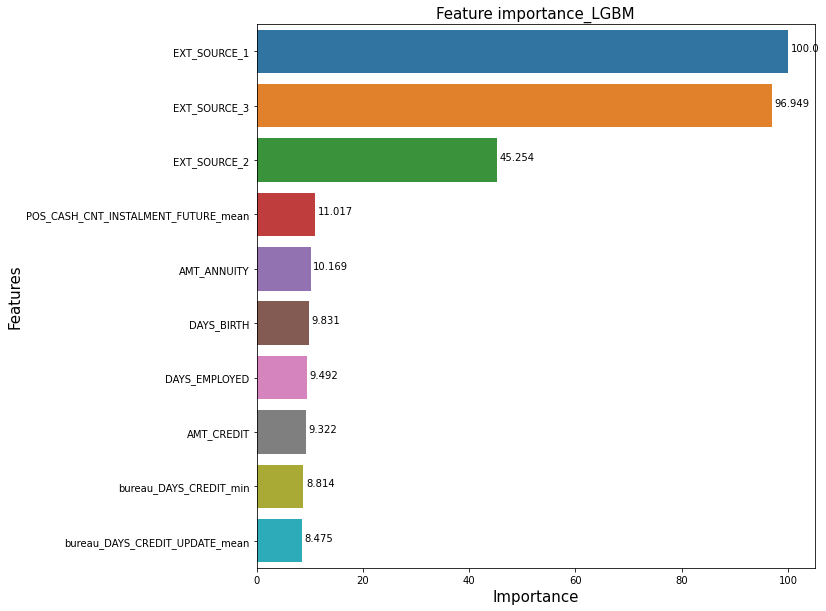

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.barplot(y="features", x="importance", data=feature_importances_LGBM.head(10), orient='h')
ax.set_xlabel('Importance', fontsize=15)
ax.set_ylabel('Features', fontsize=15)
for p in ax.patches:
        x = p.get_x() + p.get_width() + 0.5
        y = p.get_y() + p.get_height()/2
        ax.annotate(round(p.get_width(),3), (x, y))

_=ax.set_title('Feature importance_LGBM', fontsize=15)

plt.savefig('feature importance.jpg')


# Suspicious EXT_SOURCES

Boosting tree based model gave an extremely high model evaluation matrices. The EXT_SOURCES highly dominated these model. These parameters are not clearly explained in the datasets. Hence, there is a possibility of data leakage, target might be wrongly incorporated into the EXT_SOURCES. Hence, I decided to build a model without these external sources.

# 3) Baseline Model without External sources

In [ ]:
df = pd.read_csv('submission/cleaned_df_application_train_excluding 0.98 corr.csv')
X=df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3' ], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Model evaluation matrices
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print('\n')
print('ROC_AUC Score:')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))

Test Data Metrics:
[[56501     0]
 [ 4943     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56501
           1       0.00      0.00      0.00      4943

    accuracy                           0.92     61444
   macro avg       0.46      0.50      0.48     61444
weighted avg       0.85      0.92      0.88     61444



Train Data Metrics:
[[225910      2]
 [ 19860      0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    225912
           1       0.00      0.00      0.00     19860

    accuracy                           0.92    245772
   macro avg       0.46      0.50      0.48    245772
weighted avg       0.84      0.92      0.88    245772



ROC_AUC Score:
roc_auc (test): 0.685
roc_auc (training): 0.679


**Baseline Model:** Roc_AUC(TEST)=0.685, the model evaluation matrices for 1 are zero.

# 4) Search for better Model

In [ ]:
df = pd.read_csv('submission/cleaned_df_excluding 0.98 corr.csv')
df.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,most_frequent_NAME_CONTRACT_STATUS_Signed_y,previous_application_counts,count_bureau_NAME_CONTRACT_STATUS_type_Approved,count_bureau_NAME_CONTRACT_STATUS_type_Not Approved,count_bureau_NAME_CLIENT_TYPE_type_Repeater,count_bureau_NAME_CLIENT_TYPE_type_New,count_bureau_NAME_CLIENT_TYPE_type_Other,most_frequent_NAME_CONTRACT_STATUS_Not Approved,most_frequent_NAME_CLIENT_TYPE_Other,most_frequent_NAME_CLIENT_TYPE_Repeater
0,100002,1,202500.0,406597.5,24700.5,0.018801,9461,637,3648.0,2120,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,100003,0,270000.0,1293502.5,35698.5,0.003541,16765,1188,1186.0,291,...,0.0,3.0,3.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0
2,100004,0,67500.0,135000.0,6750.0,0.010032,19046,225,4260.0,2531,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,0.008019,19005,3039,9833.0,2437,...,0.0,9.0,5.0,4.0,8.0,1.0,0.0,0.0,0.0,1.0
4,100007,0,121500.0,513000.0,21865.5,0.028663,19932,3038,4311.0,3458,...,0.0,6.0,6.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
### Test train split and scaling
X=df.drop(['TARGET','SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### 4.1) Logistic Regression

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Model evaluation matrices
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print('\n')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))

Test Data Metrics:
[[56467    34]
 [ 4901    42]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56501
           1       0.55      0.01      0.02      4943

    accuracy                           0.92     61444
   macro avg       0.74      0.50      0.49     61444
weighted avg       0.89      0.92      0.88     61444



Train Data Metrics:
[[225756    156]
 [ 19725    135]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    225912
           1       0.46      0.01      0.01     19860

    accuracy                           0.92    245772
   macro avg       0.69      0.50      0.49    245772
weighted avg       0.88      0.92      0.88    245772



roc_auc (test): 0.739
roc_auc (training): 0.731


In [ ]:
#Feature importance LR
feature_importance_LR=abs(classifier_LR.coef_)[0]
features= df.drop(['TARGET','SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis=1).columns
feature_importances_LR=pd.DataFrame(list(zip(features,feature_importance_LR/max(feature_importance_LR)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LR.head(50)

,features,importance
245,FLAG_DOCUMENT_20_1,100.000000
354,mean_count_bureau_balance_STATUS_type_C,47.716660
36,NONLIVINGAREA_MODE,46.944340
37,TOTALAREA_MODE,46.313137
254,count_bureau_CREDIT_CURRENCY_type_currency 3,43.449072
523,POS_CASH_CNT_INSTALMENT_FUTURE_mean,42.851667
2,AMT_ANNUITY,42.152057
479,installments_payments_NUM_INSTALMENT_VERSION_max,42.118263
482,installments_payments_NUM_INSTALMENT_VERSION_std,38.475114
483,installments_payments_NUM_INSTALMENT_VERSION_var,35.742629


#### 4.1.1) weighted LR

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0, class_weight={0:1,1:10})
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[40794 15707]
 [ 1843  3100]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     56501
           1       0.16      0.63      0.26      4943

    accuracy                           0.71     61444
   macro avg       0.56      0.67      0.54     61444
weighted avg       0.89      0.71      0.78     61444



Train Data Metrics:
[[217556   8356]
 [   686  19174]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    225912
           1       0.70      0.97      0.81     19860

    accuracy                           0.96    245772
   macro avg       0.85      0.96      0.89    245772
weighted avg       0.97      0.96      0.97    245772

roc_auc (training): 0.734
roc_auc (test): 0.739


#### 4 .1.2) L1 Regularized LR

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:10}, penalty='l1')
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)
y_pred_train= classifier_LR.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[41098 15403]
 [ 1810  3133]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56501
           1       0.17      0.63      0.27      4943

    accuracy                           0.72     61444
   macro avg       0.56      0.68      0.55     61444
weighted avg       0.89      0.72      0.78     61444



Train Data Metrics:
[[164454  61458]
 [  7378  12482]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83    225912
           1       0.17      0.63      0.27     19860

    accuracy                           0.72    245772
   macro avg       0.56      0.68      0.55    245772
weighted avg       0.89      0.72      0.78    245772

roc_auc (training): 0.743
roc_auc (test): 0.746


In [ ]:
feature_importances_LR=abs(classifier_LR.coef_)[0]
features= df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis=1).columns
feature_importances_LR=pd.DataFrame(list(zip(features,feature_importances_LR/max(feature_importances_LR)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LR.head(50)

,features,importance
302,bureau_AMT_CREDIT_MAX_OVERDUE_var,100.000000
504,installments_payments_AMT_PAYMENT_min,92.632236
322,bureau_AMT_CREDIT_SUM_DEBT_var,52.738676
495,installments_payments_AMT_INSTALMENT_mean,51.406339
502,installments_payments_AMT_PAYMENT_mean,35.901668
301,bureau_AMT_CREDIT_MAX_OVERDUE_std,35.278672
485,installments_payments_NUM_INSTALMENT_NUMBER_sum,29.945971
487,installments_payments_NUM_INSTALMENT_NUMBER_var,26.757881
503,installments_payments_AMT_PAYMENT_median,26.456773
498,installments_payments_AMT_INSTALMENT_min,26.154130


#### 4.1.3) LR with elsticnet regularization

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='saga', random_state = 0, class_weight={0:1,1:10}, penalty='elasticnet', l1_ratio=0.5)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)
y_pred_train=classifier_LR.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[48505  7996]
 [ 3104  1839]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     56501
           1       0.19      0.37      0.25      4943

    accuracy                           0.82     61444
   macro avg       0.56      0.62      0.57     61444
weighted avg       0.88      0.82      0.85     61444



Train Data Metrics:
[[194059  31853]
 [ 12785   7075]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90    225912
           1       0.18      0.36      0.24     19860

    accuracy                           0.82    245772
   macro avg       0.56      0.61      0.57    245772
weighted avg       0.88      0.82      0.84    245772

roc_auc (training): 0.692
roc_auc (test): 0.696


### 4.2) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(random_state = 0)
classifier_DT.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_DT.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
y_pred_train=classifier_DT.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_DT.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[51322  5179]
 [ 4193   750]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     56501
           1       0.13      0.15      0.14      4943

    accuracy                           0.85     61444
   macro avg       0.53      0.53      0.53     61444
weighted avg       0.86      0.85      0.85     61444



Train Data Metrics:
[[225912      0]
 [     0  19860]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225912
           1       1.00      1.00      1.00     19860

    accuracy                           1.00    245772
   macro avg       1.00      1.00      1.00    245772
weighted avg       1.00      1.00      1.00    245772

roc_auc (training): 1.000
roc_auc (test): 0.530


### 4.3) Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF=RandomForestClassifier(random_state=0)

classifier_RF.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier_RF.predict(X_test)
y_pred_train=classifier_RF.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_RF.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[56497     4]
 [ 4936     7]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56501
           1       0.64      0.00      0.00      4943

    accuracy                           0.92     61444
   macro avg       0.78      0.50      0.48     61444
weighted avg       0.90      0.92      0.88     61444



Train Data Metrics:
[[225912      0]
 [     8  19852]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225912
           1       1.00      1.00      1.00     19860

    accuracy                           1.00    245772
   macro avg       1.00      1.00      1.00    245772
weighted avg       1.00      1.00      1.00    245772

roc_auc (training): 1.000
roc_auc (test): 0.689


In [ ]:
#Feature importance RF
feature_importance_RF = classifier_RF.feature_importances_
features= df.drop(['TARGET','SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis=1).columns
feature_importances_RF=pd.DataFrame(list(zip(features,feature_importance_RF/max(feature_importance_RF)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_RF.head(50)

,features,importance
4,DAYS_BIRTH,100.000000
7,DAYS_ID_PUBLISH,86.835927
6,DAYS_REGISTRATION,85.257818
273,most_frequent_CREDIT_TYPE_Mortgage,73.489979
2,AMT_ANNUITY,73.131225
38,OBS_30_CNT_SOCIAL_CIRCLE,72.244209
5,DAYS_EMPLOYED,72.141035
497,installments_payments_DAYS_INSTALMENT_var,71.573142
1,AMT_CREDIT,71.118519
502,installments_payments_AMT_INSTALMENT_sum,70.006447


#### 4.3.1) Weighted RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF=RandomForestClassifier(random_state=0, class_weight={0:1,1:10})

classifier_RF.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier_RF.predict(X_test)
y_pred_train = classifier_RF.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_RF.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[56496     5]
 [ 4932    11]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56501
           1       0.69      0.00      0.00      4943

    accuracy                           0.92     61444
   macro avg       0.80      0.50      0.48     61444
weighted avg       0.90      0.92      0.88     61444



Train Data Metrics:
[[225912      0]
 [    10  19850]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225912
           1       1.00      1.00      1.00     19860

    accuracy                           1.00    245772
   macro avg       1.00      1.00      1.00    245772
weighted avg       1.00      1.00      1.00    245772

roc_auc (training): 1.000
roc_auc (test): 0.714


### 4.4) AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier_AB = AdaBoostClassifier(random_state = 0)
classifier_AB.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_AB.predict(X_test)
y_pred_train = classifier_AB.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_AB.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_AB.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[56452    49]
 [ 4896    47]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56501
           1       0.49      0.01      0.02      4943

    accuracy                           0.92     61444
   macro avg       0.70      0.50      0.49     61444
weighted avg       0.89      0.92      0.88     61444



Train Data Metrics:
[[225674    238]
 [ 19657    203]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    225912
           1       0.46      0.01      0.02     19860

    accuracy                           0.92    245772
   macro avg       0.69      0.50      0.49    245772
weighted avg       0.88      0.92      0.88    245772

roc_auc (training): 0.730
roc_auc (test): 0.733


### 4.5) Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,2,5]

for learning_rate in lr_list:
    classifier_gb = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    classifier_gb.fit(X_train, y_train)


    print("Learning rate: ", learning_rate)
    y_pred_prob = classifier_gb.predict_proba(X_test)[:,1]
    y_pred_prob_train = classifier_gb.predict_proba(X_train)[:,1]
    print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
    print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
    

classifier_gb = GradientBoostingClassifier(n_estimators=20, max_features=2, learning_rate=1, max_depth=2, random_state=0)
classifier_gb.fit(X_train, y_train)

y_pred_prob = classifier_gb.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_gb.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
    

Learning rate:  0.05
roc_auc (training): 0.636
roc_auc (test): 0.643
Learning rate:  0.075
roc_auc (training): 0.640
roc_auc (test): 0.647
Learning rate:  0.1
roc_auc (training): 0.640
roc_auc (test): 0.647
Learning rate:  0.25
roc_auc (training): 0.642
roc_auc (test): 0.648
Learning rate:  0.5
roc_auc (training): 0.647
roc_auc (test): 0.652
Learning rate:  0.75
roc_auc (training): 0.648
roc_auc (test): 0.651
Learning rate:  1
roc_auc (training): 0.648
roc_auc (test): 0.652
Learning rate:  2
roc_auc (training): 0.632
roc_auc (test): 0.631
Learning rate:  5
roc_auc (training): 0.500
roc_auc (test): 0.500
roc_auc (training): 0.648
roc_auc (test): 0.652


### 4.6) XgBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_stat=0)

classifier_xgb.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier_xgb.predict(X_test)
y_pred_train = classifier_xgb.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_xgb.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[21:26:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_stat } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test Data Metrics:
[[56329   172]
 [ 4765   178]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56501
           1       0.51      0.04      0.07      4943

    accuracy                           0.92     61444
   macro avg       0.72      0.52      0.51     61444
weighted avg       0.89      0.92      0.89     61444



Train Data Metrics:
[[225646    266]
 [ 17777   2083]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    225912
           1       0.89      0.10      0.19     19860

    accuracy 

### 4.7) Weighted XgBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_stat=0, scale_pos_weight=10)

classifier_xgb.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier_xgb.predict(X_test)
y_pred_train = classifier_xgb.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_xgb.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[21:31:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_stat } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test Data Metrics:
[[44902 11599]
 [ 2268  2675]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.87     56501
           1       0.19      0.54      0.28      4943

    accuracy                           0.77     61444
   macro avg       0.57      0.67      0.57     61444
weighted avg       0.89      0.77      0.82     61444



Train Data Metrics:
[[183176  42736]
 [  4381  15479]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.89    225912
           1       0.27      0.78      0.40     19860

    accuracy 

### 4.8) LGBM

In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[44273 12228]
 [ 2145  2798]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     56501
           1       0.19      0.57      0.28      4943

    accuracy                           0.77     61444
   macro avg       0.57      0.67      0.57     61444
weighted avg       0.89      0.77      0.81     61444



Train Data Metrics:
[[177435  48477]
 [  8159  11701]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.86    225912
           1       0.19      0.59      0.29     19860

    accuracy                           0.77    245772
   macro avg       0.58      0.69      0.58    245772
weighted avg       0.89      0.77      0.82    245772



roc_auc (training): 0.765
roc_auc (test): 0.746


In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[44273 12228]
 [ 2145  2798]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     56501
           1       0.19      0.57      0.28      4943

    accuracy                           0.77     61444
   macro avg       0.57      0.67      0.57     61444
weighted avg       0.89      0.77      0.81     61444



Train Data Metrics:
[[177435  48477]
 [  8159  11701]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.86    225912
           1       0.19      0.59      0.29     19860

    accuracy                           0.77    245772
   macro avg       0.58      0.69      0.58    245772
weighted avg       0.89      0.77      0.82    245772



roc_auc (training): 0.765
roc_auc (test): 0.746


In [ ]:
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['TARGET','SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
504,installments_payments_AMT_INSTALMENT_var,100.000000
38,OBS_30_CNT_SOCIAL_CIRCLE,93.388430
5,DAYS_EMPLOYED,93.388430
1,AMT_CREDIT,90.909091
4,DAYS_BIRTH,71.900826
532,POS_CASH_SK_DPD_min,71.074380
520,POS_CASH_CNT_INSTALMENT_sum,70.247934
245,FLAG_DOCUMENT_20_1,61.157025
316,bureau_AMT_CREDIT_SUM_sum,61.157025
2,AMT_ANNUITY,56.198347


# 5)  Boosting models by Data without filling missing values and without removing collinear columns

In [ ]:
# cleaned Dataframe without filling missing values and without removing collinear columns 
df = pd.read_csv('submission/cleaned_df_with null_and_with dummies.csv')
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307216 entries, 0 to 307215
Data columns (total 647 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   SK_ID_CURR                                                   307216 non-null  int64  
 1   TARGET                                                       307216 non-null  int64  
 2   AMT_INCOME_TOTAL                                             307216 non-null  float64
 3   AMT_CREDIT                                                   307216 non-null  float64
 4   AMT_ANNUITY                                                  307216 non-null  float64
 5   AMT_GOODS_PRICE                                              307216 non-null  float64
 6   REGION_POPULATION_RELATIVE                                   307216 non-null  float64
 7   DAYS_BIRTH                                                   307

**df contains null values and some collinear columns.**

In [ ]:
### Test train split and scaling
X=df.drop(['TARGET','SK_ID_CURR'], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### Weighted XgBoost

In [ ]:
classifier_xgb = XGBClassifier(random_stat=0, scale_pos_weight=10)

classifier_xgb.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_xgb.predict(X_test)

# Model evaluation matrices
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_xgb.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_xgb.predict_proba(X_train)[:,1]
    
print('\n')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))

[22:34:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_stat } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test Data Metrics:
[[45510 10991]
 [ 2084  2859]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.87     56501
           1       0.21      0.58      0.30      4943

    accuracy                           0.79     61444
   macro avg       0.58      0.69      0.59     61444
weighted avg       0.90      0.79      0.83     61444



Train Data Metrics:
[[186194  39718]
 [  3897  15963]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.90    225912
           1       0.29      0.80      0.42     19860

    accuracy 

#### LGBM

In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[43690 12811]
 [ 1831  3112]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86     56501
           1       0.20      0.63      0.30      4943

    accuracy                           0.76     61444
   macro avg       0.58      0.70      0.58     61444
weighted avg       0.90      0.76      0.81     61444



Train Data Metrics:
[[174874  51038]
 [  7011  12849]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86    225912
           1       0.20      0.65      0.31     19860

    accuracy                           0.76    245772
   macro avg       0.58      0.71      0.58    245772
weighted avg       0.90      0.76      0.81    245772



roc_auc (training): 0.789
roc_auc (test): 0.775


In [ ]:
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['TARGET','SK_ID_CURR'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
10,EXT_SOURCE_1,100.000000
11,EXT_SOURCE_2,86.831276
12,EXT_SOURCE_3,77.777778
1,AMT_CREDIT,44.855967
6,DAYS_EMPLOYED,44.855967
2,AMT_ANNUITY,40.740741
601,POS_CASH_CNT_INSTALMENT_FUTURE_mean,37.860082
582,installments_payments_AMT_PAYMENT_min,37.448560
5,DAYS_BIRTH,37.037037
9,OWN_CAR_AGE,28.395062


## 5.1) Without including Ext_SOURCES

In [ ]:
### Test train split and scaling
X=df.drop(['TARGET','SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Weighted XgBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(random_stat=0, scale_pos_weight=10)

classifier_xgb.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier_xgb.predict(X_test)

# Model evaluation matrices
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_xgb.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))



from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_xgb.predict_proba(X_train)[:,1]
    
print('\n')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))

[22:45:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_stat } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test Data Metrics:
[[45147 11354]
 [ 2242  2701]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     56501
           1       0.19      0.55      0.28      4943

    accuracy                           0.78     61444
   macro avg       0.57      0.67      0.58     61444
weighted avg       0.89      0.78      0.82     61444



Train Data Metrics:
[[184987  40925]
 [  4220  15640]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89    225912
           1       0.28      0.79      0.41     19860

    accuracy 

### LGBM

In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[44482 12019]
 [ 2146  2797]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     56501
           1       0.19      0.57      0.28      4943

    accuracy                           0.77     61444
   macro avg       0.57      0.68      0.57     61444
weighted avg       0.89      0.77      0.82     61444



Train Data Metrics:
[[178083  47829]
 [  8054  11806]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.86    225912
           1       0.20      0.59      0.30     19860

    accuracy                           0.77    245772
   macro avg       0.58      0.69      0.58    245772
weighted avg       0.90      0.77      0.82    245772



roc_auc (training): 0.769
roc_auc (test): 0.750


In [ ]:
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['TARGET','SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
1,AMT_CREDIT,100.000000
57,DAYS_LAST_PHONE_CHANGE,92.561983
579,installments_payments_AMT_PAYMENT_min,89.256198
6,DAYS_EMPLOYED,89.256198
5,DAYS_BIRTH,83.471074
3,AMT_GOODS_PRICE,71.900826
2,AMT_ANNUITY,65.289256
598,POS_CASH_CNT_INSTALMENT_FUTURE_mean,64.462810
9,OWN_CAR_AGE,62.809917
65,CODE_GENDER_M,61.983471


# 6) Models by resampling data to make a balanced dataset: Data resampled by SMOTE


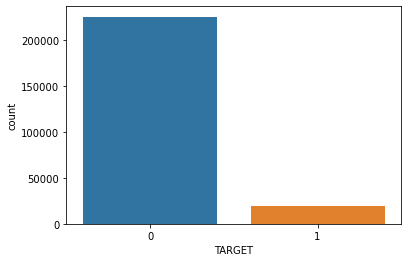

In [ ]:
df = pd.read_csv('submission/cleaned_df_excluding 0.98 corr.csv')

X=df.drop(['TARGET','SK_ID_CURR'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
sns.countplot(pd.Series(y_train))

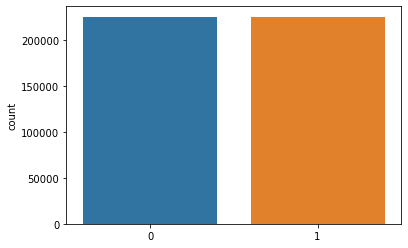

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 101)

X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

sns.countplot(pd.Series(y_train_new))

**Resampled data is well balanced.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train=scaler.fit_transform(X_train_new)
X_test=scaler.transform(X_test)
y_train=y_train_new

### 6.1) Logistic Regression

Test Data Metrics:
[[55900   601]
 [ 4417   526]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56501
           1       0.47      0.11      0.17      4943

    accuracy                           0.92     61444
   macro avg       0.70      0.55      0.57     61444
weighted avg       0.89      0.92      0.89     61444



Train Data Metrics:
[[223658   2254]
 [ 17952 207960]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    225912
           1       0.99      0.92      0.95    225912

    accuracy                           0.96    451824
   macro avg       0.96      0.96      0.96    451824
weighted avg       0.96      0.96      0.96    451824



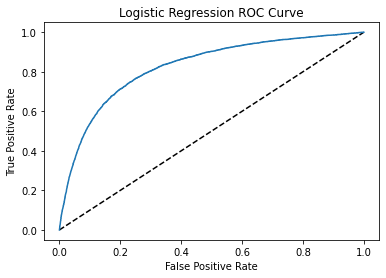

roc_auc (training): 0.984
roc_auc (test): 0.825


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_curve
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

#### 6.1.1) Regularized LR

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, penalty='l1')
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[55940   561]
 [ 4432   511]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56501
           1       0.48      0.10      0.17      4943

    accuracy                           0.92     61444
   macro avg       0.70      0.55      0.56     61444
weighted avg       0.89      0.92      0.89     61444



Train Data Metrics:
[[223763   2149]
 [ 18005 207907]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    225912
           1       0.99      0.92      0.95    225912

    accuracy                           0.96    451824
   macro avg       0.96      0.96      0.96    451824
weighted avg       0.96      0.96      0.96    451824

roc_auc (training): 0.985
roc_auc (test): 0.830


### 6.2) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF=RandomForestClassifier(random_state=0)

classifier_RF.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier_RF.predict(X_test)
y_pred_train=classifier_RF.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_RF.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[56416    85]
 [ 3719  1224]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     56501
           1       0.94      0.25      0.39      4943

    accuracy                           0.94     61444
   macro avg       0.94      0.62      0.68     61444
weighted avg       0.94      0.94      0.92     61444



Train Data Metrics:
[[225912      0]
 [     1 225911]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225912
           1       1.00      1.00      1.00    225912

    accuracy                           1.00    451824
   macro avg       1.00      1.00      1.00    451824
weighted avg       1.00      1.00      1.00    451824

roc_auc (training): 1.000
roc_auc (test): 0.935


### 6.3) Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier_AB = AdaBoostClassifier(random_state = 0)
classifier_AB.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_AB.predict(X_test)
y_pred_train=classifier_AB.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_AB.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_AB.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[54679  1822]
 [ 1567  3376]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     56501
           1       0.65      0.68      0.67      4943

    accuracy                           0.94     61444
   macro avg       0.81      0.83      0.82     61444
weighted avg       0.95      0.94      0.95     61444



Train Data Metrics:
[[218625   7287]
 [  8309 217603]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    225912
           1       0.97      0.96      0.97    225912

    accuracy                           0.97    451824
   macro avg       0.97      0.97      0.97    451824
weighted avg       0.97      0.97      0.97    451824

roc_auc (training): 0.994
roc_auc (test): 0.950


### 6.4) XgBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_stat=0)

classifier_xgb.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier_xgb.predict(X_test)
y_pred_train=classifier_xgb.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_xgb.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[23:41:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_stat } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test Data Metrics:
[[56339   162]
 [ 1473  3470]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56501
           1       0.96      0.70      0.81      4943

    accuracy                           0.97     61444
   macro avg       0.96      0.85      0.90     61444
weighted avg       0.97      0.97      0.97     61444



Train Data Metrics:
[[225762    150]
 [  4875 221037]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    225912
           1       1.00      0.98      0.99    225912

    accuracy 

### 6.5) LGBM

In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred=clf.predict(X_test)

y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)

y_pred_train=clf.predict(X_train)
y_pred_train=y_pred_train.round(0)
y_pred_train=y_pred_train.astype(int)


from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred)))



[[56124   377]
 [ 1549  3394]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56501
           1       0.90      0.69      0.78      4943

    accuracy                           0.97     61444
   macro avg       0.94      0.84      0.88     61444
weighted avg       0.97      0.97      0.97     61444



Train Data Metrics:
[[224345   1567]
 [  8271 217641]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    225912
           1       0.99      0.96      0.98    225912

    accuracy                           0.98    451824
   macro avg       0.98      0.98      0.98    451824
weighted avg       0.98      0.98      0.98    451824

roc_auc (training): 0.978
roc_auc (test): 0.840


In [ ]:
# feature importance LGBM
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['TARGET','SK_ID_CURR'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
9,EXT_SOURCE_1,100.000000
11,EXT_SOURCE_3,42.446043
264,most_frequent_CREDIT_ACTIVE_Closed,34.892086
554,count_bureau_NAME_CONTRACT_STATUS_type_Not App...,32.733813
38,OBS_30_CNT_SOCIAL_CIRCLE,22.661871
558,most_frequent_NAME_CONTRACT_STATUS_Not Approved,19.424460
251,count_bureau_CREDIT_CURRENCY_type_currency 1,12.949640
166,WALLSMATERIAL_MODE_Others,12.410072
10,EXT_SOURCE_2,11.870504
161,HOUSETYPE_MODE_block of flats,11.690647


# 7) Models by resampled data without including EXT_SOURCES

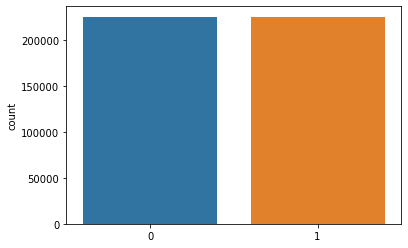

In [ ]:
df = pd.read_csv('submission/cleaned_df_excluding 0.98 corr.csv')

X=df.drop(['TARGET','SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


# resampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 101)

X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

sns.countplot(pd.Series(y_train_new))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train=scaler.fit_transform(X_train_new)
X_test=scaler.transform(X_test)
y_train=y_train_new

## 7.1) Regularized LR

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, penalty='l1')
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[56392   109]
 [ 4875    68]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56501
           1       0.38      0.01      0.03      4943

    accuracy                           0.92     61444
   macro avg       0.65      0.51      0.49     61444
weighted avg       0.88      0.92      0.88     61444



Train Data Metrics:
[[225465    447]
 [ 19961 205951]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    225912
           1       1.00      0.91      0.95    225912

    accuracy                           0.95    451824
   macro avg       0.96      0.95      0.95    451824
weighted avg       0.96      0.95      0.95    451824

roc_auc (training): 0.976
roc_auc (test): 0.737


In [ ]:
# feature importance LR
feature_importances_LR=abs(classifier_LR.coef_)[0]
features= df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis=1).columns
feature_importances_LR=pd.DataFrame(list(zip(features,feature_importances_LR/max(feature_importances_LR)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LR.head(50)

,features,importance
504,installments_payments_AMT_PAYMENT_min,100.000000
184,CNT_FAM_MEMBERS_5.0,33.850324
487,installments_payments_NUM_INSTALMENT_NUMBER_var,31.172825
485,installments_payments_NUM_INSTALMENT_NUMBER_sum,30.790170
419,credit_card_balance_AMT_PAYMENT_CURRENT_sum,30.298730
535,count_POS_NAME_CONTRACT_STATUS_type_Active,25.994146
183,CNT_FAM_MEMBERS_4.0,25.576140
170,CNT_CHILDREN_3,25.408855
505,installments_payments_previous_installments_co...,23.960950
0,AMT_INCOME_TOTAL,19.641225


## 7.2) LGBM

In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred=clf.predict(X_test)

y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)

y_pred_train=clf.predict(X_train)
y_pred_train=y_pred_train.round(0)
y_pred_train=y_pred_train.astype(int)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred)))

[[56476    25]
 [ 4939     4]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56501
           1       0.14      0.00      0.00      4943

    accuracy                           0.92     61444
   macro avg       0.53      0.50      0.48     61444
weighted avg       0.86      0.92      0.88     61444



Train Data Metrics:
[[225799    113]
 [ 21463 204449]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    225912
           1       1.00      0.90      0.95    225912

    accuracy                           0.95    451824
   macro avg       0.96      0.95      0.95    451824
weighted avg       0.96      0.95      0.95    451824

roc_auc (training): 0.952
roc_auc (test): 0.500


In [ ]:
# feature importance LGBM
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['TARGET','SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
551,count_bureau_NAME_CONTRACT_STATUS_type_Not App...,100.000000
555,most_frequent_NAME_CONTRACT_STATUS_Not Approved,98.770492
35,OBS_30_CNT_SOCIAL_CIRCLE,60.655738
261,most_frequent_CREDIT_ACTIVE_Closed,60.245902
536,count_POS_NAME_CONTRACT_STATUS_type_Completed,35.245902
62,NAME_EDUCATION_TYPE_Higher education,33.196721
68,NAME_FAMILY_STATUS_Single / not married,29.098361
557,most_frequent_NAME_CLIENT_TYPE_Repeater,28.688525
67,NAME_FAMILY_STATUS_Separated,27.868852
181,CNT_FAM_MEMBERS_2.0,27.049180


# 8) Dimensionality reduction: PCA

In [ ]:
df = pd.read_csv('submission/cleaned_df_excluding 0.98 corr.csv')
df.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,most_frequent_NAME_CONTRACT_STATUS_Signed_y,previous_application_counts,count_bureau_NAME_CONTRACT_STATUS_type_Approved,count_bureau_NAME_CONTRACT_STATUS_type_Not Approved,count_bureau_NAME_CLIENT_TYPE_type_Repeater,count_bureau_NAME_CLIENT_TYPE_type_New,count_bureau_NAME_CLIENT_TYPE_type_Other,most_frequent_NAME_CONTRACT_STATUS_Not Approved,most_frequent_NAME_CLIENT_TYPE_Other,most_frequent_NAME_CLIENT_TYPE_Repeater
0,100002,1,202500.0,406597.5,24700.5,0.018801,9461,637,3648.0,2120,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,100003,0,270000.0,1293502.5,35698.5,0.003541,16765,1188,1186.0,291,...,0.0,3.0,3.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0
2,100004,0,67500.0,135000.0,6750.0,0.010032,19046,225,4260.0,2531,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,0.008019,19005,3039,9833.0,2437,...,0.0,9.0,5.0,4.0,8.0,1.0,0.0,0.0,0.0,1.0
4,100007,0,121500.0,513000.0,21865.5,0.028663,19932,3038,4311.0,3458,...,0.0,6.0,6.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X=df.drop(['TARGET','SK_ID_CURR'], axis=1).values
y=df['TARGET'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents_df = pca.fit_transform(X)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [8.95950066e-01 7.73079686e-02 2.66956075e-02 4.36030593e-05
 1.24896552e-06 7.09847246e-07 3.36529911e-07 1.89415946e-07
 1.65641349e-07 6.98810591e-08]


## 8.1) Visualization using two principal components 

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR'], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents_df = pca.fit_transform(X)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.89595007 0.07730797]


In [ ]:
principal_df = pd.DataFrame(data = principalComponents_df, columns = ['principal component 1', 'principal component 2'])
principal_df.tail()

,principal component 1,principal component 2
307211,-6.886895e+11,-2.632305e+11
307212,-6.886895e+11,-2.632305e+11
307213,8.922541e+10,2.934998e+11
307214,-6.886895e+11,-2.632305e+11
307215,-5.784771e+11,-2.243172e+11


<Figure size 432x288 with 0 Axes>

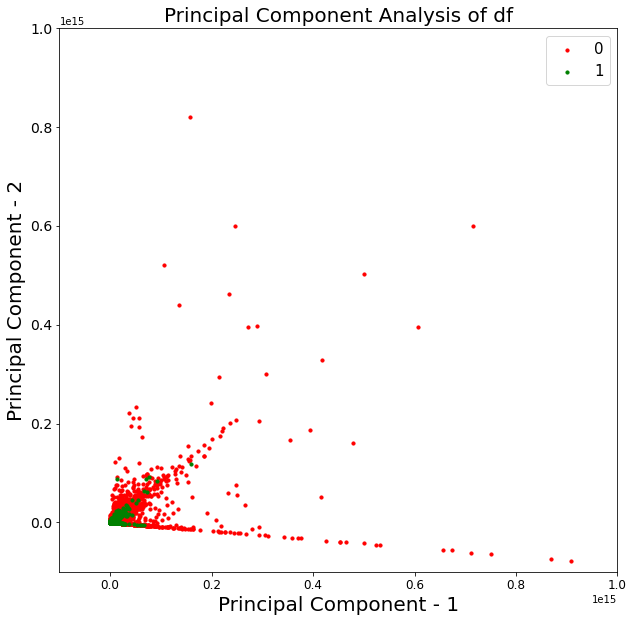

In [ ]:
plt.figure()
_=plt.figure(figsize=(10,10))
_=plt.xticks(fontsize=12)
_=plt.yticks(fontsize=14)
_=plt.xlabel('Principal Component - 1',fontsize=20)
_=plt.ylabel('Principal Component - 2',fontsize=20)
_=plt.title("Principal Component Analysis",fontsize=20)
_=plt.xlim([-0.1e15, 1e15])
_=plt.ylim([-0.1e15, 1e15])

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['TARGET'] == target
    plt.scatter(principal_df.loc[indicesToKeep, 'principal component 1']
               , principal_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 10)

_=plt.legend(targets,prop={'size': 15})

## 8.2) LGBM Models using various PCs




### 8.2.1) LGBM using PCs=2

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR'], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test= pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(sorted(explained_variance*100, reverse=True))

[5.929752709570287, 5.4161096125140835]


In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[42547 13954]
 [ 2856  2087]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.84     56501
           1       0.13      0.42      0.20      4943

    accuracy                           0.73     61444
   macro avg       0.53      0.59      0.52     61444
weighted avg       0.87      0.73      0.78     61444



Train Data Metrics:
[[169817  56095]
 [ 11406   8454]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.83    225912
           1       0.13      0.43      0.20     19860

    accuracy                           0.73    245772
   macro avg       0.53      0.59      0.52    245772
weighted avg       0.87      0.73      0.78    245772



roc_auc (training): 0.637
roc_auc (test): 0.631


### 8.2.2) LGBM using PCs=10

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR'], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test= pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(sorted(explained_variance*100, reverse=True))

[5.929752819120666, 5.416110539565749, 4.708705935511351, 4.099796600278141, 3.5506727621540612, 3.108255276769413, 2.9728071369342732, 2.531134217911632, 2.438546107377139, 2.3223858230085392]


In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[42622 13879]
 [ 2587  2356]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.84     56501
           1       0.15      0.48      0.22      4943

    accuracy                           0.73     61444
   macro avg       0.54      0.62      0.53     61444
weighted avg       0.88      0.73      0.79     61444



Train Data Metrics:
[[171062  54850]
 [ 10126   9734]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84    225912
           1       0.15      0.49      0.23     19860

    accuracy                           0.74    245772
   macro avg       0.55      0.62      0.54    245772
weighted avg       0.88      0.74      0.79    245772



roc_auc (training): 0.686
roc_auc (test): 0.673


### 8.2.3) LGBM using PCs=300

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 300)
X_train = pca.fit_transform(X_train)
X_test= pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
sorted(explained_variance*100, reverse=True)

[5.929752819654663,
 5.416110542931186,
 4.708705979800777,
 4.099796696008431,
 3.5506732116892854,
 3.1082610589617072,
 2.9728152280935074,
 2.53118290710376,
 2.4385683339959408,
 2.3227263555905733,
 2.2106086385750343,
 1.8735999144068285,
 1.8430918994567478,
 1.7542291311019242,
 1.6675490853134949,
 1.6420688508419885,
 1.551063378979415,
 1.5262217634383928,
 1.403637682564684,
 1.320035094415433,
 1.2762962036346561,
 1.2702514998436518,
 1.2538473179023615,
 1.2460706808106936,
 1.0796291481510119,
 1.0714348908089226,
 1.0029644698020403,
 0.9503456294187098,
 0.9373744661540742,
 0.9234830855377334,
 0.9135171126061291,
 0.9087421193992904,
 0.8790687131901228,
 0.8768464174338816,
 0.8622904618301513,
 0.8060254721633688,
 0.7989837332183601,
 0.7715749685008217,
 0.7325807888158814,
 0.7293717556032211,
 0.6947720413735512,
 0.6737321654795723,
 0.6404164737077768,
 0.6316641801707084,
 0.6217419807859271,
 0.6100882330522837,
 0.57851394458205,
 0.5592547921307477,
 0.

In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[46868  9633]
 [ 1722  3221]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     56501
           1       0.25      0.65      0.36      4943

    accuracy                           0.82     61444
   macro avg       0.61      0.74      0.63     61444
weighted avg       0.91      0.82      0.85     61444



Train Data Metrics:
[[188095  37817]
 [  6080  13780]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90    225912
           1       0.27      0.69      0.39     19860

    accuracy                           0.82    245772
   macro avg       0.62      0.76      0.64    245772
weighted avg       0.91      0.82      0.85    245772



roc_auc (training): 0.844
roc_auc (test): 0.823


### 8.2.4) LGBM using PCs with explained varience >0.6

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(0.6)
X_train = pca.fit_transform(X_train)
X_test= pca.transform(X_test)
print(pca.n_components_)
print('\n')

26




In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[43115 13386]
 [ 2533  2410]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84     56501
           1       0.15      0.49      0.23      4943

    accuracy                           0.74     61444
   macro avg       0.55      0.63      0.54     61444
weighted avg       0.88      0.74      0.79     61444



Train Data Metrics:
[[173179  52733]
 [  9751  10109]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85    225912
           1       0.16      0.51      0.24     19860

    accuracy                           0.75    245772
   macro avg       0.55      0.64      0.55    245772
weighted avg       0.88      0.75      0.80    245772



roc_auc (training): 0.705
roc_auc (test): 0.685


### 8.2.5) Model using PCs with explained varience >0.8

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR'], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(0.8)
X_train = pca.fit_transform(X_train)
X_test= pca.transform(X_test)
print(pca.n_components_)
print('\n')

52




In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[43542 12959]
 [ 2347  2596]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85     56501
           1       0.17      0.53      0.25      4943

    accuracy                           0.75     61444
   macro avg       0.56      0.65      0.55     61444
weighted avg       0.89      0.75      0.80     61444



Train Data Metrics:
[[174935  50977]
 [  8740  11120]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85    225912
           1       0.18      0.56      0.27     19860

    accuracy                           0.76    245772
   macro avg       0.57      0.67      0.56    245772
weighted avg       0.89      0.76      0.81    245772



roc_auc (training): 0.741
roc_auc (test): 0.714


### 8.2.6) Model using PCs with explained varience >0.8

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test= pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(sorted(explained_variance*100, reverse=True))

[5.948764813720457, 5.457562368659603]


In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[42575 13926]
 [ 2900  2043]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.84     56501
           1       0.13      0.41      0.20      4943

    accuracy                           0.73     61444
   macro avg       0.53      0.58      0.52     61444
weighted avg       0.87      0.73      0.78     61444



Train Data Metrics:
[[169880  56032]
 [ 11533   8327]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.83    225912
           1       0.13      0.42      0.20     19860

    accuracy                           0.73    245772
   macro avg       0.53      0.59      0.52    245772
weighted avg       0.87      0.73      0.78    245772



roc_auc (training): 0.633
roc_auc (test): 0.624


# 9) PCA Without including EXT_SOURCES

## 9.1) LGBM models using various PCs

### 9.1.1) PCs=10

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test= pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(sorted(explained_variance*100, reverse=True))

[5.948766110294885, 5.457563476431913, 4.742386302575152, 4.131852033991649, 3.5751688373828276, 3.126521934406437, 2.994801462793824, 2.5504962528262953, 2.4582447800439513, 2.3400798831111542]


In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[42637 13864]
 [ 2597  2346]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.84     56501
           1       0.14      0.47      0.22      4943

    accuracy                           0.73     61444
   macro avg       0.54      0.61      0.53     61444
weighted avg       0.88      0.73      0.79     61444



Train Data Metrics:
[[171065  54847]
 [ 10262   9598]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84    225912
           1       0.15      0.48      0.23     19860

    accuracy                           0.74    245772
   macro avg       0.55      0.62      0.53    245772
weighted avg       0.88      0.74      0.79    245772



roc_auc (training): 0.681
roc_auc (test): 0.668


### 9.1.2) PCs with explained varience >0.6

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(0.8)
X_train = pca.fit_transform(X_train)
X_test= pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(sorted(explained_variance*100, reverse=True))

[5.948766111469381, 5.457563481536843, 4.742386339251775, 4.1318528677283215, 3.5751708122181842, 3.126531388178655, 2.994810282825355, 2.5505631117496628, 2.4582636017060358, 2.340268187755094, 2.2289260179746115, 1.8880610129255344, 1.8583333999204346, 1.768442109379156, 1.68062007904404, 1.6553809573615166, 1.5641202213441396, 1.5390185318247833, 1.4153084250030379, 1.3312237794590798, 1.286915754034397, 1.2784006500322629, 1.263682587421655, 1.2524717712526376, 1.0832215255573474, 1.0746119876040257, 1.0079507196852313, 0.9577805036942061, 0.9435707057253933, 0.9309966482726988, 0.9200984945971651, 0.9121451055698707, 0.8858580666230347, 0.8839219969395162, 0.8609802318898183, 0.8123862458318118, 0.7915188852580199, 0.7732893646992258, 0.7377844966732997, 0.7339185978499516, 0.6948470507471068, 0.6790840226083021, 0.6393769918586273, 0.629065743088519, 0.6244678534632625, 0.6144312105381422, 0.5822082678749911, 0.5632225400534783, 0.547694261690748, 0.5317255505115321, 0.5253805897

In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[43146 13355]
 [ 2479  2464]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.84     56501
           1       0.16      0.50      0.24      4943

    accuracy                           0.74     61444
   macro avg       0.55      0.63      0.54     61444
weighted avg       0.88      0.74      0.80     61444



Train Data Metrics:
[[173620  52292]
 [  9515  10345]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85    225912
           1       0.17      0.52      0.25     19860

    accuracy                           0.75    245772
   macro avg       0.56      0.64      0.55    245772
weighted avg       0.88      0.75      0.80    245772



roc_auc (training): 0.715
roc_auc (test): 0.688


### 9.1.3) PCs with explained varience >0.9

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1).values
y=df['TARGET'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(0.9)
X_train = pca.fit_transform(X_train)
X_test= pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(sorted(explained_variance*100, reverse=True))

[5.948766111469381, 5.457563481536843, 4.742386339251775, 4.1318528677283215, 3.5751708122181842, 3.126531388178655, 2.994810282825355, 2.5505631117496628, 2.4582636017060358, 2.340268187755094, 2.2289260179746115, 1.8880610129255344, 1.8583333999204346, 1.768442109379156, 1.68062007904404, 1.6553809573615166, 1.5641202213441396, 1.5390185318247833, 1.4153084250030379, 1.3312237794590798, 1.286915754034397, 1.2784006500322629, 1.263682587421655, 1.2524717712526376, 1.0832215255573474, 1.0746119876040257, 1.0079507196852313, 0.9577805036942061, 0.9435707057253933, 0.9309966482726988, 0.9200984945971651, 0.9121451055698707, 0.8858580666230347, 0.8839219969395162, 0.8609802318898183, 0.8123862458318118, 0.7915188852580199, 0.7732893646992258, 0.7377844966732997, 0.7339185978499516, 0.6948470507471068, 0.6790840226083021, 0.6393769918586273, 0.629065743088519, 0.6244678534632625, 0.6144312105381422, 0.5822082678749911, 0.5632225400534783, 0.547694261690748, 0.5317255505115321, 0.5253805897

In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[43529 12972]
 [ 2552  2391]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     56501
           1       0.16      0.48      0.24      4943

    accuracy                           0.75     61444
   macro avg       0.55      0.63      0.54     61444
weighted avg       0.88      0.75      0.80     61444



Train Data Metrics:
[[174962  50950]
 [  9542  10318]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85    225912
           1       0.17      0.52      0.25     19860

    accuracy                           0.75    245772
   macro avg       0.56      0.65      0.55    245772
weighted avg       0.89      0.75      0.80    245772



roc_auc (training): 0.721
roc_auc (test): 0.691


# 10) Best Models, RFECV and Hyperparameter Tuning

**Analysis of model performance matrices shows LGBM and L1 regularized LR models are the best models.**

In [ ]:
df = pd.read_csv('submission/cleaned_df_excluding 0.98 corr.csv')
df.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,most_frequent_NAME_CONTRACT_STATUS_Signed_y,previous_application_counts,count_bureau_NAME_CONTRACT_STATUS_type_Approved,count_bureau_NAME_CONTRACT_STATUS_type_Not Approved,count_bureau_NAME_CLIENT_TYPE_type_Repeater,count_bureau_NAME_CLIENT_TYPE_type_New,count_bureau_NAME_CLIENT_TYPE_type_Other,most_frequent_NAME_CONTRACT_STATUS_Not Approved,most_frequent_NAME_CLIENT_TYPE_Other,most_frequent_NAME_CLIENT_TYPE_Repeater
0,100002,1,202500.0,406597.5,24700.5,0.018801,9461,637,3648.0,2120,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,100003,0,270000.0,1293502.5,35698.5,0.003541,16765,1188,1186.0,291,...,0.0,3.0,3.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0
2,100004,0,67500.0,135000.0,6750.0,0.010032,19046,225,4260.0,2531,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,0.008019,19005,3039,9833.0,2437,...,0.0,9.0,5.0,4.0,8.0,1.0,0.0,0.0,0.0,1.0
4,100007,0,121500.0,513000.0,21865.5,0.028663,19932,3038,4311.0,3458,...,0.0,6.0,6.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X=df.drop(['TARGET','SK_ID_CURR'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### Light GBM

In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score

#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.01
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10,
params['random_state']=101

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)


y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]


from sklearn.metrics import classification_report,confusion_matrix

print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))


Test Data Metrics:
[[55954   467]
 [ 1464  3559]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56421
           1       0.88      0.71      0.79      5023

    accuracy                           0.97     61444
   macro avg       0.93      0.85      0.88     61444
weighted avg       0.97      0.97      0.97     61444



Train Data Metrics:
[[224263   1729]
 [  5588  14192]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    225992
           1       0.89      0.72      0.80     19780

    accuracy                           0.97    245772
   macro avg       0.93      0.85      0.89    245772
weighted avg       0.97      0.97      0.97    245772

roc_auc (training): 0.972
roc_auc (test): 0.970


#### LR with L1 regularization

Test Data Metrics:
[[45097 11324]
 [ 1287  3736]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     56421
           1       0.25      0.74      0.37      5023

    accuracy                           0.79     61444
   macro avg       0.61      0.77      0.62     61444
weighted avg       0.91      0.79      0.84     61444



Train Data Metrics:
[[181098  44894]
 [  5021  14759]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88    225992
           1       0.25      0.75      0.37     19780

    accuracy                           0.80    245772
   macro avg       0.61      0.77      0.63    245772
weighted avg       0.91      0.80      0.84    245772



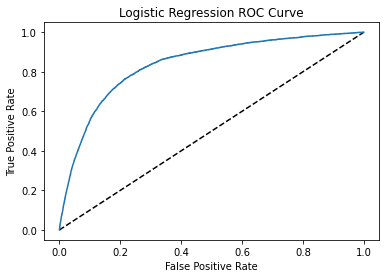

roc_auc (training): 0.838
roc_auc (test): 0.838


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:10}, penalty='l1')
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

# 10.1) LGBM

##### Frac. of Data and feature_importances

In [ ]:
# Checking model using Fraction of Data

dff=df.sample(frac=0.25, random_state=0)
X=dff.drop(['TARGET','SK_ID_CURR'], axis=1)
y=dff['TARGET']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score

#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.01
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)


y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]


from sklearn.metrics import classification_report,confusion_matrix

print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[13940   120]
 [  374   927]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14060
           1       0.89      0.71      0.79      1301

    accuracy                           0.97     15361
   macro avg       0.93      0.85      0.89     15361
weighted avg       0.97      0.97      0.97     15361



Train Data Metrics:
[[56037   450]
 [ 1413  3543]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     56487
           1       0.89      0.71      0.79      4956

    accuracy                           0.97     61443
   macro avg       0.93      0.85      0.89     61443
weighted avg       0.97      0.97      0.97     61443

roc_auc (training): 0.979
roc_auc (test): 0.970


In [ ]:
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['TARGET','SK_ID_CURR'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
11,EXT_SOURCE_3,100.000000
9,EXT_SOURCE_1,94.435612
10,EXT_SOURCE_2,39.268680
313,bureau_AMT_CREDIT_SUM_median,11.287758
343,bureau_DAYS_CREDIT_UPDATE_min,10.015898
5,DAYS_EMPLOYED,7.313196
278,bureau_DAYS_CREDIT_min,7.154213
523,POS_CASH_CNT_INSTALMENT_FUTURE_mean,6.677266
312,bureau_AMT_CREDIT_SUM_mean,6.518283
275,bureau_DAYS_CREDIT_mean,6.041335


In [ ]:
to_drop_1=feature_importances_LGBM[feature_importances_LGBM['importance']==0]['features'].values.tolist()
print('No. of features to drop: {}'.format(len(to_drop_1)))

df1=dff.drop(to_drop_1, axis=1)
df1.to_csv('submission/frac_df including more than 0% feature importances_LGBM.csv',index=False)

No. of features to drop: 402


#### Rechecking the model after feature selection using feature importance

In [ ]:
dff=pd.read_csv('submission/frac_df including more than 0% feature importances_LGBM.csv')
X=dff.drop(['TARGET','SK_ID_CURR'], axis=1)
y=dff['TARGET']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Test Data Metrics:
[[13939   121]
 [  380   921]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14060
           1       0.88      0.71      0.79      1301

    accuracy                           0.97     15361
   macro avg       0.93      0.85      0.88     15361
weighted avg       0.97      0.97      0.97     15361



Train Data Metrics:
[[56040   447]
 [ 1420  3536]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     56487
           1       0.89      0.71      0.79      4956

    accuracy                           0.97     61443
   macro avg       0.93      0.85      0.89     61443
weighted avg       0.97      0.97      0.97     61443



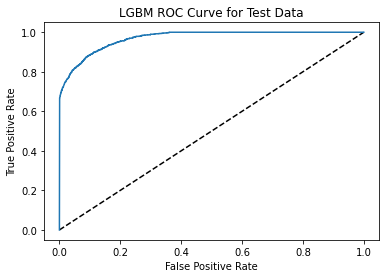

roc_auc (training): 0.979
roc_auc (test): 0.970


In [ ]:
#LGBM
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score

#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.01
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)


y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]


from sklearn.metrics import classification_report,confusion_matrix

print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


from sklearn.metrics import roc_curve
y_pred_prob=clf.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LGBM classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC Curve for Test Data')
plt.show()

print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

**The roc_auc remains almost similar after selected features and frac. of data. Hence, we can run RFECV over this fraction of data with these selected features.**

#### RFECV for LGBM

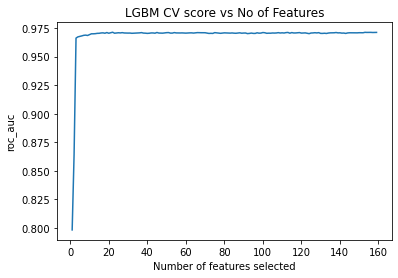

In [ ]:
from sklearn.feature_selection import RFECV
import sklearn.metrics


#choose estimator/model type for Recursive feature elimination and cross valiation

estimator =  lgb.LGBMClassifier(n_estimators=105)
selector = RFECV(estimator, step=1, min_features_to_select=1, cv=10, scoring='roc_auc')

#fit the model, get a rank of the variables, and a matrix of the selected X variables
selector = selector.fit(X_train, y_train)


#PLot # of features selected vs. Model Score
plt.figure()
plt.title('LGBM CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("roc_auc")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

#get rank of X model features
rank = selector.ranking_
#Subset features to those selected by recursive feature elimination
#X_train_scaled = X_train_scaled[:,selector.support_ ] 

y_pred = selector.predict(X_test)

In [ ]:
print('No. of features used: {}'.format(len(selector.grid_scores_))
print('Optimal number of features: {}'.format(selector.n_features_))

No. of features used: 159
Optimal number of features: 22


In [ ]:
# Selected features
columns=[]
selected=[]
rank=[]

for i in range(X.shape[1]):
   columns.append(X.columns[i])
   selected.append(selector.support_[i])
   rank.append(selector.ranking_[i])


df_selectedFeatures=pd.DataFrame()
df_selectedFeatures['columns']=columns
df_selectedFeatures['selected']=selected
df_selectedFeatures['rank']=rank 
df_selectedFeatures=df_selectedFeatures[df_selectedFeatures['rank']==1]
df_selectedFeatures['importance']=selector.estimator_.feature_importances_
df_selectedFeatures=df_selectedFeatures.sort_values(by='importance', ascending=False)
df_selectedFeatures

,columns,selected,rank,importance
7,EXT_SOURCE_1,True,1,354
9,EXT_SOURCE_3,True,1,300
8,EXT_SOURCE_2,True,1,211
2,AMT_ANNUITY,True,1,157
53,bureau_DAYS_CREDIT_median,True,1,145
4,DAYS_BIRTH,True,1,133
1,AMT_CREDIT,True,1,129
139,POS_CASH_MONTHS_BALANCE_sum,True,1,129
61,bureau_DAYS_CREDIT_ENDDATE_min,True,1,129
55,bureau_DAYS_CREDIT_min,True,1,128


In [ ]:
selected_features=list(df_selectedFeatures['columns'].values)
optimum_features_LGBM=['SK_ID_CURR','TARGET']+selected_features
optimum_features_LGBM

['SK_ID_CURR',
 'TARGET',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'AMT_ANNUITY',
 'bureau_DAYS_CREDIT_median',
 'DAYS_BIRTH',
 'AMT_CREDIT',
 'POS_CASH_MONTHS_BALANCE_sum',
 'bureau_DAYS_CREDIT_ENDDATE_min',
 'bureau_DAYS_CREDIT_min',
 'bureau_DAYS_CREDIT_std',
 'POS_CASH_CNT_INSTALMENT_FUTURE_mean',
 'DAYS_ID_PUBLISH',
 'bureau_AMT_CREDIT_SUM_median',
 'installments_payments_DAYS_INSTALMENT_max',
 'DAYS_EMPLOYED',
 'installments_payments_AMT_PAYMENT_median',
 'installments_payments_NUM_INSTALMENT_NUMBER_std',
 'installments_payments_AMT_PAYMENT_min',
 'installments_payments_AMT_INSTALMENT_max',
 'bureau_DAYS_CREDIT_UPDATE_median',
 'bureau_DAYS_CREDIT_ENDDATE_mean']

In [ ]:
new_df=dff[optimum_features_LGBM]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76804 entries, 0 to 76803
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   SK_ID_CURR                                       76804 non-null  int64  
 1   TARGET                                           76804 non-null  int64  
 2   EXT_SOURCE_1                                     76804 non-null  float64
 3   EXT_SOURCE_3                                     76804 non-null  float64
 4   EXT_SOURCE_2                                     76804 non-null  float64
 5   AMT_ANNUITY                                      76804 non-null  float64
 6   bureau_DAYS_CREDIT_median                        76804 non-null  float64
 7   DAYS_BIRTH                                       76804 non-null  int64  
 8   AMT_CREDIT                                       76804 non-null  float64
 9   POS_CASH_MONTHS_BALANCE_sum 

In [ ]:
new_df.to_csv('submission/frac_df including more than 0% feature importances_LGBM_after RFECV.csv',index=False)

## Model recheck after RFECV 

In [ ]:
df1=pd.read_csv('submission/frac_df including more than 0% feature importances_LGBM_after RFECV.csv')

X=df1.drop(['TARGET','SK_ID_CURR'], axis=1)
y=df1['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score

#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.01
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)


y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]


from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve

print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[13928   132]
 [  374   927]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14060
           1       0.88      0.71      0.79      1301

    accuracy                           0.97     15361
   macro avg       0.92      0.85      0.88     15361
weighted avg       0.97      0.97      0.97     15361



Train Data Metrics:
[[56013   474]
 [ 1391  3565]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     56487
           1       0.88      0.72      0.79      4956

    accuracy                           0.97     61443
   macro avg       0.93      0.86      0.89     61443
weighted avg       0.97      0.97      0.97     61443

roc_auc (training): 0.977
roc_auc (test): 0.970


**Model performance remains almost similar.**

# 10.2) Best Models and RFECV without including Ext sources

#### 10.2.1) LGBM

##### Feature importances

In [ ]:
df = pd.read_csv('submission/cleaned_df_excluding 0.98 corr.csv')

X=df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score

#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10.
params['random_state']=101

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[44324 12097]
 [ 2295  2728]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     56421
           1       0.18      0.54      0.27      5023

    accuracy                           0.77     61444
   macro avg       0.57      0.66      0.57     61444
weighted avg       0.89      0.77      0.81     61444



Train Data Metrics:
[[177936  48056]
 [  8139  11641]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.86    225992
           1       0.20      0.59      0.29     19780

    accuracy                           0.77    245772
   macro avg       0.58      0.69      0.58    245772
weighted avg       0.89      0.77      0.82    245772



roc_auc (training): 0.766
roc_auc (test): 0.739


In [ ]:
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
1,AMT_CREDIT,100.000000
504,installments_payments_AMT_INSTALMENT_var,88.461538
38,OBS_30_CNT_SOCIAL_CIRCLE,86.923077
4,DAYS_BIRTH,80.000000
5,DAYS_EMPLOYED,79.230769
532,POS_CASH_SK_DPD_min,63.846154
520,POS_CASH_CNT_INSTALMENT_sum,61.538462
7,DAYS_ID_PUBLISH,58.461538
245,FLAG_DOCUMENT_20_1,58.461538
46,AMT_REQ_CREDIT_BUREAU_QRT,56.153846


In [ ]:
to_drop_1=feature_importances_LGBM[feature_importances_LGBM['importance']==0]['features'].values.tolist()
print('No. of features to drop:{}'.format(len(to_drop_1)))

No. of features to drop:353


In [ ]:
df1=df.drop(to_drop_1, axis=1)
df1=df1.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)
df1.to_csv('submission/df including more than 0% feature importances_LGBM_without Ext source.csv',index=False)

##### Rechecking model after feature selection

In [ ]:
df = pd.read_csv('submission/df including more than 0% feature importances_LGBM_without Ext source.csv')

X=df.drop(['TARGET','SK_ID_CURR'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10.
params['random_state']=101

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[44083 12338]
 [ 2354  2669]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     56421
           1       0.18      0.53      0.27      5023

    accuracy                           0.76     61444
   macro avg       0.56      0.66      0.56     61444
weighted avg       0.89      0.76      0.81     61444



Train Data Metrics:
[[176651  49341]
 [  8533  11247]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86    225992
           1       0.19      0.57      0.28     19780

    accuracy                           0.76    245772
   macro avg       0.57      0.68      0.57    245772
weighted avg       0.89      0.76      0.81    245772



roc_auc (training): 0.751
roc_auc (test): 0.726


**The roc_auc remains almost similar after selected features. Hence, we can run RFECV with these selected features.**

##### RFECV for LGBM

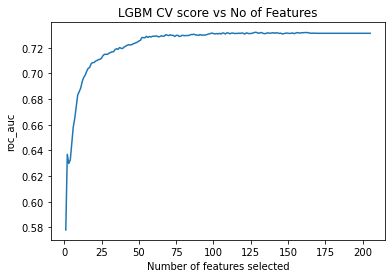

In [ ]:
from sklearn.feature_selection import RFECV
import sklearn.metrics


#choose estimator/model type for Recursive feature elimination and cross valiation

estimator =  lgb.LGBMClassifier(n_estimators=105)
selector = RFECV(estimator, step=1, min_features_to_select=1, cv=10, scoring='roc_auc')

#fit the model, get a rank of the variables, and a matrix of the selected X variables
selector = selector.fit(X_train, y_train)


#PLot # of features selected vs. Model Score
plt.figure()
plt.title('LGBM CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("roc_auc")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

#get rank of X model features
rank = selector.ranking_
#Subset features to those selected by recursive feature elimination
#X_train_scaled = X_train_scaled[:,selector.support_ ] 

y_pred = selector.predict(X_test)

In [ ]:
print('No. of features used: {}'.format(len(selector.grid_scores_))
print('Optimal number of features: {}'.format(selector.n_features_))

No. of features used: 205
Optimal number of features: 128


In [ ]:
# Selected features
columns=[]
selected=[]
rank=[]

for i in range(X.shape[1]):
   columns.append(X.columns[i])
   selected.append(selector.support_[i])
   rank.append(selector.ranking_[i])


df_selectedFeatures=pd.DataFrame()
df_selectedFeatures['columns']=columns
df_selectedFeatures['selected']=selected
df_selectedFeatures['rank']=rank 
df_selectedFeatures=df_selectedFeatures[df_selectedFeatures['rank']==1]
df_selectedFeatures['importance']=selector.estimator_.feature_importances_
df_selectedFeatures=df_selectedFeatures.sort_values(by='importance', ascending=False)
df_selectedFeatures

,columns,selected,rank,importance
1,AMT_CREDIT,True,1,138
2,AMT_ANNUITY,True,1,98
5,DAYS_EMPLOYED,True,1,88
4,DAYS_BIRTH,True,1,78
173,installments_payments_AMT_PAYMENT_min,True,1,77
...,...,...,...,...
39,OCCUPATION_TYPE_Medicine staff,True,1,6
20,NONLIVINGAREA_MODE,True,1,6
127,credit_card_balance_AMT_DRAWINGS_POS_CURRENT_var,True,1,6
19,NONLIVINGAPARTMENTS_MODE,True,1,4


In [ ]:
selected_features=list(df_selectedFeatures['columns'].values)
optimum_features_LGBM=['SK_ID_CURR','TARGET']+selected_features
optimum_features_LGBM

['SK_ID_CURR',
 'TARGET',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'installments_payments_AMT_PAYMENT_min',
 'bureau_DAYS_CREDIT_min',
 'DAYS_ID_PUBLISH',
 'REGION_POPULATION_RELATIVE',
 'bureau_AMT_CREDIT_SUM_DEBT_sum',
 'POS_CASH_CNT_INSTALMENT_FUTURE_mean',
 'POS_CASH_CNT_INSTALMENT_FUTURE_var',
 'credit_card_balance_CNT_DRAWINGS_ATM_CURRENT_var',
 'DAYS_REGISTRATION',
 'installments_payments_AMT_INSTALMENT_sum',
 'installments_payments_AMT_PAYMENT_median',
 'bureau_DAYS_CREDIT_median',
 'count_bureau_CREDIT_TYPE_type_Credit card',
 'installments_payments_AMT_PAYMENT_mean',
 'bureau_AMT_CREDIT_SUM_max',
 'OWN_CAR_AGE',
 'POS_CASH_SK_DPD_DEF_mean',
 'bureau_DAYS_CREDIT_ENDDATE_median',
 'bureau_DAYS_CREDIT_mean',
 'NAME_EDUCATION_TYPE_Higher education',
 'credit_card_balance_CNT_DRAWINGS_CURRENT_max',
 'bureau_DAYS_CREDIT_UPDATE_median',
 'POS_CASH_MONTHS_BALANCE_min',
 'bureau_AMT_CREDIT_SUM_mean',
 'installments_payments_AMT_INSTALMENT_median',
 'installment

In [ ]:
new_df=df[optimum_features_LGBM]
new_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307216 entries, 0 to 307215
Data columns (total 130 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   SK_ID_CURR                                           307216 non-null  int64  
 1   TARGET                                               307216 non-null  int64  
 2   AMT_CREDIT                                           307216 non-null  float64
 3   AMT_ANNUITY                                          307216 non-null  float64
 4   DAYS_EMPLOYED                                        307216 non-null  int64  
 5   DAYS_BIRTH                                           307216 non-null  int64  
 6   installments_payments_AMT_PAYMENT_min                307216 non-null  float64
 7   bureau_DAYS_CREDIT_min                               307216 non-null  float64
 8   DAYS_ID_PUBLISH                                      

In [ ]:
new_df.to_csv('submission/df including more than 0% feature importances_LGBM_after RFECV_without Ext source.csv',index=False)

##### Rechecking model after RFECV

In [ ]:
df=pd.read_csv('submission/df including more than 0% feature importances_LGBM_after RFECV_without Ext source.csv')

X=df.drop(['TARGET','SK_ID_CURR'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10.
params['random_state']=101

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[44118 12303]
 [ 2359  2664]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     56421
           1       0.18      0.53      0.27      5023

    accuracy                           0.76     61444
   macro avg       0.56      0.66      0.56     61444
weighted avg       0.89      0.76      0.81     61444



Train Data Metrics:
[[176897  49095]
 [  8539  11241]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86    225992
           1       0.19      0.57      0.28     19780

    accuracy                           0.77    245772
   macro avg       0.57      0.68      0.57    245772
weighted avg       0.89      0.77      0.81    245772



roc_auc (training): 0.751
roc_auc (test): 0.725


##### Grid search/Randomised Search

**Starting Model**

In [ ]:
df = pd.read_csv('submission/df including more than 0% feature importances_LGBM_after RFECV_without Ext source.csv')
df=df.sample(frac=0.5,random_state=0)


X=df.drop(['TARGET','SK_ID_CURR'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


#### LGBM
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score, roc_auc_score


#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=50,
params['scale_pos_weight']=10,
params['random_state']=101

#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('\n')
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[22162  6109]
 [ 1117  1334]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     28271
           1       0.18      0.54      0.27      2451

    accuracy                           0.76     30722
   macro avg       0.57      0.66      0.56     30722
weighted avg       0.89      0.76      0.81     30722



Train Data Metrics:
[[88792 24100]
 [ 4037  5957]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.86    112892
           1       0.20      0.60      0.30      9994

    accuracy                           0.77    122886
   macro avg       0.58      0.69      0.58    122886
weighted avg       0.89      0.77      0.82    122886



roc_auc (training): 0.774
roc_auc (test): 0.729


In [ ]:
#GRidSearch CV
param_grid = {
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25,50,100],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [0, 1, 2.5, 5, 10,15,20],
    'reg_lambda': [0,1,2.5,5,10,15,20],
    'min_split_gain': [0.3, 0.4, 0.8,1, 1.5],
    'scale_pos_weight':[5,8,9,10,11,12,15,20,50,100],
    'subsample': [0.5, 0.8, 0.9],
    'subsample_freq': [10,20,30,40],
    'learning_rate':[0.01,0.03,0.05,0.1,0.3,0.5,1]}
    
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

gsearch = GridSearchCV(estimator = lgb.LGBMClassifier(random_state=0), param_grid = param_grid, scoring='roc_auc', cv=5)
gsearch.fit(X_train,y_train)
gsearch.best_params_, gsearch.best_score_

**GRidsearch CV is computationally intensive.**

In [ ]:
# Randomized CV
param_grid = {
    'n_estimators':list(np.arange(150,200,2)),
   'colsample_bytree': list(np.linspace(0,1,11)),
    'max_depth': list(np.arange(10,100,5)),
    'num_leaves': list(np.arange(25, 100, 25)),
    'reg_alpha': [0, 1, 2.5, 5, 10,15,20],
    'reg_lambda': [0,1,2.5,5,10,15,20],
    'min_split_gain': [0.3, 0.4, 0.8,1.5],
    'scale_pos_weight':[7,8,9,10,11,12,13,14,15],
    'subsample': list(np.arange(0.2,1,0.1)),
    'subsample_freq': list(np.arange(10,50,5))}


import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

clf = lgb.LGBMClassifier(random_state=0, learning_rate=0.05)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_grid, 
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=0,
    verbose=True)



# Fit the object to our data
gs.fit(X_train, y_train)


print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 48.6min finished


0.726750029526275
{'subsample_freq': 10, 'subsample': 0.7000000000000002, 'scale_pos_weight': 7, 'reg_lambda': 2.5, 'reg_alpha': 5, 'num_leaves': 25, 'n_estimators': 196, 'min_split_gain': 0.4, 'max_depth': 20, 'colsample_bytree': 0.7000000000000001}


In [ ]:
param_grid = {
    'n_estimators':list(np.arange(100,200,5)),
   'colsample_bytree': list(np.linspace(0,1,11)),
    'max_depth': list(np.arange(10,100,5)),
    'num_leaves': list(np.arange(25, 100, 25)),
    'reg_alpha': [0, 1, 2.5, 5, 10,15,20],
    'reg_lambda': [0,1,2.5,5,10,15,20],
    'min_split_gain': [0.3, 0.4, 0.8,1.5],
    'scale_pos_weight':[5,6,7,8,9,10,11,12,15,20,50,100],
    'subsample': list(np.arange(0.2,1,0.1)),
    'subsample_freq': list(np.arange(10,50,5))}

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

clf = lgb.LGBMClassifier(random_state=0, learning_rate=0.05)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_grid, 
    n_iter=200,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=0,
    verbose=True)


# Fit the object to our data
gs.fit(X_train, y_train)


print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 87.7min finished


0.7269380378878043
{'subsample_freq': 45, 'subsample': 0.9000000000000001, 'scale_pos_weight': 6, 'reg_lambda': 10, 'reg_alpha': 10, 'num_leaves': 50, 'n_estimators': 170, 'min_split_gain': 1.5, 'max_depth': 50, 'colsample_bytree': 0.9}


In [ ]:
param_grid = {
    'n_estimators':list(np.arange(150,200,2)),
   'colsample_bytree': list(np.linspace(0,1,11)),
    'max_depth': list(np.arange(10,100,5)),
    'num_leaves': list(np.arange(25, 100, 25)),
    'reg_alpha': [0, 1, 2.5, 5, 10,15,20],
    'reg_lambda': [0,1,2.5,5,10,15,20],
    'min_split_gain': [0.3, 0.4, 0.8,1.5],
    'scale_pos_weight':[5,6,7,8,9,10,11,12,13,14,15],
    'subsample': list(np.arange(0.2,1,0.1)),
    'subsample_freq': list(np.arange(10,50,5))}


import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

clf = lgb.LGBMClassifier(random_state=0, learning_rate=0.05)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_grid, 
    n_iter=200,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=0,
    verbose=True)


# Fit the object to our data
gs.fit(X_train, y_train)


print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 116.3min finished


0.727037250510142
{'subsample_freq': 20, 'subsample': 0.8000000000000003, 'scale_pos_weight': 8, 'reg_lambda': 10, 'reg_alpha': 1, 'num_leaves': 25, 'n_estimators': 174, 'min_split_gain': 0.4, 'max_depth': 55, 'colsample_bytree': 0.6000000000000001}


In [ ]:
param_grid = {
    'n_estimators':list(np.arange(150,200,2)),
   'colsample_bytree': list(np.linspace(0,1,11)),
    'max_depth': list(np.arange(10,100,5)),
    'num_leaves': list(np.arange(25, 100, 25)),
    'reg_alpha': [0, 1, 2.5, 5, 10,15,20],
    'reg_lambda': [0,1,2.5,5,10,15,20],
    'min_split_gain': [0.3, 0.4, 0.8,1.5],
    'scale_pos_weight':[7,8,9,10,11,12,13,14,15],
    'subsample': list(np.arange(0.2,1,0.1)),
    'subsample_freq': list(np.arange(10,50,5))}

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

clf = lgb.LGBMClassifier(random_state=0, learning_rate=0.05)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_grid, 
    n_iter=200,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=0,
    verbose=True)

# Fit the object to our data
gs.fit(X_train, y_train)


print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 98.5min finished


0.726750029526275
{'subsample_freq': 10, 'subsample': 0.7000000000000002, 'scale_pos_weight': 7, 'reg_lambda': 2.5, 'reg_alpha': 5, 'num_leaves': 25, 'n_estimators': 196, 'min_split_gain': 0.4, 'max_depth': 20, 'colsample_bytree': 0.7000000000000001}


####  10.2.2) Regularized LR

##### Feature Importances and Frac. of data

In [4]:
df = pd.read_csv('submission/cleaned_df_excluding 0.98 corr.csv')

X=df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:10}, penalty='l1')
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[41188 15233]
 [ 1873  3150]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56421
           1       0.17      0.63      0.27      5023

    accuracy                           0.72     61444
   macro avg       0.56      0.68      0.55     61444
weighted avg       0.89      0.72      0.78     61444



Train Data Metrics:
[[164965  61027]
 [  7368  12412]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83    225992
           1       0.17      0.63      0.27     19780

    accuracy                           0.72    245772
   macro avg       0.56      0.68      0.55    245772
weighted avg       0.89      0.72      0.78    245772

roc_auc (training): 0.745
roc_auc (test): 0.741


In [ ]:
feature_importance_LR=abs(classifier_LR.coef_)[0]
features= df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1).columns
feature_importances_LR=pd.DataFrame(list(zip(features,feature_importance_LR/max(feature_importance_LR)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LR.head(50)

,features,importance
504,installments_payments_AMT_PAYMENT_min,100.000000
302,bureau_AMT_CREDIT_MAX_OVERDUE_var,98.791925
495,installments_payments_AMT_INSTALMENT_mean,78.649636
322,bureau_AMT_CREDIT_SUM_DEBT_var,70.417997
502,installments_payments_AMT_PAYMENT_mean,53.743633
301,bureau_AMT_CREDIT_MAX_OVERDUE_std,35.363585
419,credit_card_balance_AMT_PAYMENT_CURRENT_sum,33.856091
485,installments_payments_NUM_INSTALMENT_NUMBER_sum,32.379853
336,bureau_AMT_CREDIT_SUM_OVERDUE_var,28.376053
320,bureau_AMT_CREDIT_SUM_DEBT_sum,27.711040


In [ ]:
to_drop=feature_importances_LR[feature_importances_LR['importance']<0.5]['features'].values.tolist()
print('No. of features to drop: {}'.format(len(to_drop)))

df2=df.drop(to_drop, axis=1)
df2=df2.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)
df2.to_csv('submission/df including 0.5% feature importances_LR_without Ext source.csv',index=False)

No. of features to drop: 258


##### Rechecking model using selected features

In [ ]:
df = pd.read_csv('submission/df including 0.5% feature importances_LR_without Ext source.csv')

X=df.drop(['TARGET','SK_ID_CURR'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:10}, penalty='l1')
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[40864 15637]
 [ 1799  3144]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     56501
           1       0.17      0.64      0.27      4943

    accuracy                           0.72     61444
   macro avg       0.56      0.68      0.54     61444
weighted avg       0.89      0.72      0.78     61444



Train Data Metrics:
[[163825  62087]
 [  7432  12428]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.82    225912
           1       0.17      0.63      0.26     19860

    accuracy                           0.72    245772
   macro avg       0.56      0.68      0.54    245772
weighted avg       0.89      0.72      0.78    245772

roc_auc (training): 0.739
roc_auc (test): 0.744


In [ ]:
# Fraction of Data
df = pd.read_csv('submission/df including 0.5% feature importances_LR_without Ext source.csv')
dff=df.sample(frac=0.05, random_state=0)

X=dff.drop(['TARGET','SK_ID_CURR'], axis=1)
y=dff['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:10}, penalty='l1')
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[2029  772]
 [ 116  156]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      2801
           1       0.17      0.57      0.26       272

    accuracy                           0.71      3073
   macro avg       0.56      0.65      0.54      3073
weighted avg       0.88      0.71      0.77      3073



Train Data Metrics:
[[8257 3022]
 [ 313  696]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     11279
           1       0.19      0.69      0.29      1009

    accuracy                           0.73     12288
   macro avg       0.58      0.71      0.56     12288
weighted avg       0.90      0.73      0.79     12288

roc_auc (training): 0.782
roc_auc (test): 0.707


**Model evaluation matrices follows a similar trend with selected feature and fraction of Data. Hence, these frac of data will be used for RFECV.**

##### RFECV LR

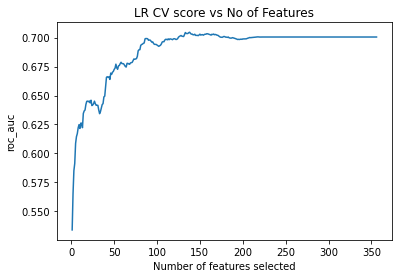

In [ ]:
from sklearn.feature_selection import RFECV
import sklearn.metrics
from sklearn.linear_model import LogisticRegression

#choose estimator/model type for Recursive feature elimination and cross valiation

estimator =  LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:10}, penalty='l1')
selector = RFECV(estimator, step=1, min_features_to_select=1, cv=10, scoring='roc_auc')

#fit the model, get a rank of the variables, and a matrix of the selected X variables
selector = selector.fit(X_train, y_train)


#PLot # of features selected vs. Model Score
plt.figure()
plt.title('LR CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("roc_auc")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

#get rank of X model features
rank = selector.ranking_
#Subset features to those selected by recursive feature elimination
#X_train_scaled = X_train_scaled[:,selector.support_ ] 

y_pred = selector.predict(X_test)

In [ ]:
print('No. of features used: {}'.format(len(selector.grid_scores_))
print('Optimal number of features: {}'.format(selector.n_features_))

No. of features used: 356
Optimal number of features: 138


In [ ]:
# Selected features
columns=[]
selected=[]
rank=[]

for i in range(X.shape[1]):
   columns.append(X.columns[i])
   selected.append(selector.support_[i])
   rank.append(selector.ranking_[i])


df_selectedFeatures=pd.DataFrame()
df_selectedFeatures['columns']=columns
df_selectedFeatures['selected']=selected
df_selectedFeatures['rank']=rank 
df_selectedFeatures=df_selectedFeatures[df_selectedFeatures['rank']==1]
df_selectedFeatures['importance']=selector.estimator_.feature_importances_
df_selectedFeatures=df_selectedFeatures.sort_values(by='importance', ascending=False)
df_selectedFeatures

,columns,selected,rank
1,AMT_ANNUITY,True,1
2,DAYS_BIRTH,True,1
3,DAYS_EMPLOYED,True,1
7,APARTMENTS_AVG,True,1
14,FLOORSMAX_AVG,True,1
...,...,...,...
342,count_POS_NAME_CONTRACT_STATUS_type_Completed,True,1
343,count_POS_NAME_CONTRACT_STATUS_type_Signed,True,1
344,count_POS_NAME_CONTRACT_STATUS_type_Approved,True,1
348,most_frequent_NAME_CONTRACT_STATUS_Completed_y,True,1


In [ ]:
selected_features=list(df_selectedFeatures['columns'].values)
optimum_features_LR=['SK_ID_CURR','TARGET']+selected_features
optimum_features_LR

['SK_ID_CURR',
 'TARGET',
 'AMT_ANNUITY',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'APARTMENTS_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'LANDAREA_MODE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'NAME_TYPE_SUITE_Other',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'OCCUPATION_TYPE_HR staff',
 'OCCUPATION_TYPE_High skill tech staff',
 'OCCUPATION_TYPE_Realty agents',
 'OCCUPATION_TYPE_Secretaries',
 'ORGANIZATION_TYPE_Electricity',
 'ORGANIZATION_TYPE_Hotel',
 'ORGANIZATION_TYPE_Industry: type 1',
 'ORGANIZATION_TYPE_Industry: type 12',
 'ORGANIZATION_TYPE_Industry: type 4',
 'ORGANIZATION_TYPE_Industry: type 5',
 'ORGANIZATION_TYPE_Industry: type 9',
 'ORGANIZATION_TYPE_Insurance'

In [ ]:
new_df=df[optimum_features_LR]
new_df.to_csv('submission/frac_df including 0.5% feature importances_LR_after RFECV_without Ext source.csv',index=False)

##### Check the model using df after RFECV

In [ ]:
df=pd.read_csv('submission/frac_df including 0.5% feature importances_LR_after RFECV_without Ext source.csv')

X=df.drop(['TARGET','SK_ID_CURR'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:10}, penalty='l1')
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[1934  887]
 [ 101  151]]
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      2821
           1       0.15      0.60      0.23       252

    accuracy                           0.68      3073
   macro avg       0.55      0.64      0.52      3073
weighted avg       0.88      0.68      0.75      3073



Train Data Metrics:
[[7822 3428]
 [ 363  675]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.80     11250
           1       0.16      0.65      0.26      1038

    accuracy                           0.69     12288
   macro avg       0.56      0.67      0.53     12288
weighted avg       0.89      0.69      0.76     12288

roc_auc (training): 0.745
roc_auc (test): 0.688


**Model evaluation matrices follows a similar trend.**

##### GridSearchCV and RandomSearch CV

**Starting Model**

In [ ]:
df=pd.read_csv('submission/frac_df including 0.5% feature importances_LR_after RFECV_without Ext source.csv')

X=df.drop(['TARGET','SK_ID_CURR'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:10}, penalty='l1')
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

Test Data Metrics:
[[1934  887]
 [ 101  151]]
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      2821
           1       0.15      0.60      0.23       252

    accuracy                           0.68      3073
   macro avg       0.55      0.64      0.52      3073
weighted avg       0.88      0.68      0.75      3073



Train Data Metrics:
[[7822 3428]
 [ 363  675]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.80     11250
           1       0.16      0.65      0.26      1038

    accuracy                           0.69     12288
   macro avg       0.56      0.67      0.53     12288
weighted avg       0.89      0.69      0.76     12288

roc_auc (training): 0.745
roc_auc (test): 0.688


In [ ]:
#RandomSearch CV
w = [{0:1,1:5},{0:1,1:7.5}, {0:1,1:10}, {0:1,1:12.5},{0:1,1:15}, {0:1,1:6},{0:1,1:7},{0:1,1:8}, {0:1,1:9}, {0:1,1:11},{0:1,1:12}, {0:1,1:13}, {0:1,1:14},{0:1,1:15}]

param_grid = {
    "class_weight": w,
    "C": list(np.arange(0,3,0.25))
}


from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:10}, penalty='l1')

rs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_grid, 
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=0,
    verbose=True)



# Fit the object to our data
rs.fit(X_train, y_train)


print(rs.best_score_)
print(rs.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 37.0min finished


0.7023865766546925
{'class_weight': {0: 1, 1: 5}, 'C': 1.0}


In [ ]:
#RandomSearch CV

w = [{0:1,1:5},{0:1,1:7.5}, {0:1,1:10}, {0:1,1:12.5},{0:1,1:15}, {0:1,1:6},{0:1,1:7},{0:1,1:8}, {0:1,1:9}, {0:1,1:11},{0:1,1:12}, {0:1,1:13}, {0:1,1:14},{0:1,1:15}]

param_grid = {
    "class_weight": w,
    "C": list(np.arange(0,3,0.25))
}


from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:10}, penalty='l1')

rs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_grid, 
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=0,
    verbose=True)



# Fit the object to our data
rs.fit(X_train, y_train)


print(rs.best_score_)
print(rs.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 63.3min finished


0.7023865766546925
{'class_weight': {0: 1, 1: 5}, 'C': 1.0}


# 11) Final Models

In [ ]:
df = pd.read_csv('cleaned_df_without null_and_with dummies_excluding 0.98 corr.csv')
df.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,most_frequent_NAME_CONTRACT_STATUS_Signed_y,previous_application_counts,count_bureau_NAME_CONTRACT_STATUS_type_Approved,count_bureau_NAME_CONTRACT_STATUS_type_Not Approved,count_bureau_NAME_CLIENT_TYPE_type_Repeater,count_bureau_NAME_CLIENT_TYPE_type_New,count_bureau_NAME_CLIENT_TYPE_type_Other,most_frequent_NAME_CONTRACT_STATUS_Not Approved,most_frequent_NAME_CLIENT_TYPE_Other,most_frequent_NAME_CLIENT_TYPE_Repeater
0,100002,1,202500.0,406597.5,24700.5,0.018801,9461,637,3648.0,2120,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,100003,0,270000.0,1293502.5,35698.5,0.003541,16765,1188,1186.0,291,...,0.0,3.0,3.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0
2,100004,0,67500.0,135000.0,6750.0,0.010032,19046,225,4260.0,2531,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,0.008019,19005,3039,9833.0,2437,...,0.0,9.0,5.0,4.0,8.0,1.0,0.0,0.0,0.0,1.0
4,100007,0,121500.0,513000.0,21865.5,0.028663,19932,3038,4311.0,3458,...,0.0,6.0,6.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0


##### Including EXT_SOURCES

###### LR

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:6}, penalty='l1', C=0.5)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

from sklearn.metrics import roc_curve
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print('\n')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))

Test Data Metrics:
[[49873  6548]
 [ 2001  3022]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     56421
           1       0.32      0.60      0.41      5023

    accuracy                           0.86     61444
   macro avg       0.64      0.74      0.67     61444
weighted avg       0.91      0.86      0.88     61444



Train Data Metrics:
[[199713  26279]
 [  7849  11931]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92    225992
           1       0.31      0.60      0.41     19780

    accuracy                           0.86    245772
   macro avg       0.64      0.74      0.67    245772
weighted avg       0.91      0.86      0.88    245772



roc_auc (test): 0.838
roc_auc (training): 0.837


In [ ]:
feature_importance_LR=abs(classifier_LR.coef_)[0]
features= df.drop(['TARGET','SK_ID_CURR'], axis=1).columns
feature_importances_LR=pd.DataFrame(list(zip(features,feature_importance_LR/max(feature_importance_LR)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LR.head(50)

,features,importance
507,installments_payments_AMT_PAYMENT_min,100.000000
46,AMT_REQ_CREDIT_BUREAU_QRT,59.799258
488,installments_payments_NUM_INSTALMENT_NUMBER_sum,46.529808
323,bureau_AMT_CREDIT_SUM_DEBT_sum,45.690625
490,installments_payments_NUM_INSTALMENT_NUMBER_var,38.491759
422,credit_card_balance_AMT_PAYMENT_CURRENT_sum,36.440018
9,EXT_SOURCE_1,31.662251
538,count_POS_NAME_CONTRACT_STATUS_type_Active,30.461956
321,bureau_AMT_CREDIT_SUM_DEBT_max,29.630310
482,installments_payments_NUM_INSTALMENT_VERSION_std,27.836235


###### LGBM

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


import lightgbm as lgb

#converting the dataset into proper LGB format 
train_set = lgb.Dataset(data = X_train, label = y_train)


#Specifying the parameter
params={}
params['learning_rate']=0.05
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=55
params['subsample_freq']= 20, 
params['subsample']= 0.8000000000000003,
params['scale_pos_weight']=7, 
params['reg_lambda']=10, 
params['reg_alpha']=1, 
params['num_leaves']= 25,
params['min_split_gain']= 0.4,
params['colsample_bytree']= 0.6000000000000001,
params['scale_pos_weight']= 8,
params['n_estimators']= 174


#train the model 
clf=lgb.train(params,train_set,105)  #train the model for 100 iterations

#prediction on the test set
y_pred_prob=clf.predict(X_test)
y_pred_prob_train=clf.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[[53347  3074]
 [  785  4238]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     56421
           1       0.58      0.84      0.69      5023

    accuracy                           0.94     61444
   macro avg       0.78      0.89      0.83     61444
weighted avg       0.95      0.94      0.94     61444



Train Data Metrics:
[[213869  12123]
 [  2479  17301]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    225992
           1       0.59      0.87      0.70     19780

    accuracy                           0.94    245772
   macro avg       0.79      0.91      0.84    245772
weighted avg       0.96      0.94      0.95    245772

roc_auc (training): 0.980
roc_auc (test): 0.974


In [ ]:
feature_importance_LGBM = clf.feature_importance()
features= df.drop(['TARGET','SK_ID_CURR'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
9,EXT_SOURCE_1,100.000000
11,EXT_SOURCE_3,91.368421
10,EXT_SOURCE_2,35.368421
4,DAYS_BIRTH,18.526316
1,AMT_CREDIT,17.684211
2,AMT_ANNUITY,16.842105
507,installments_payments_AMT_PAYMENT_min,16.631579
5,DAYS_EMPLOYED,14.105263
523,POS_CASH_CNT_INSTALMENT_FUTURE_mean,13.263158
291,bureau_DAYS_CREDIT_ENDDATE_min,12.421053


#### Excluding EXT_SOURCES

###### LR

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(solver='liblinear', random_state = 0, class_weight={0:1,1:6}, penalty='l1', C=0.5)
classifier_LR.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Test Data Metrics:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n')
print('Train Data Metrics:')
y_pred = classifier_LR.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


from sklearn.metrics import roc_auc_score
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
y_pred_prob_train = classifier_LR.predict_proba(X_train)[:,1]
    
print('\n')
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))


Test Data Metrics:
[[49782  6639]
 [ 3060  1963]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     56421
           1       0.23      0.39      0.29      5023

    accuracy                           0.84     61444
   macro avg       0.59      0.64      0.60     61444
weighted avg       0.88      0.84      0.86     61444



Train Data Metrics:
[[199220  26772]
 [ 11927   7853]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91    225992
           1       0.23      0.40      0.29     19780

    accuracy                           0.84    245772
   macro avg       0.59      0.64      0.60    245772
weighted avg       0.89      0.84      0.86    245772



roc_auc (test): 0.740
roc_auc (training): 0.743


In [ ]:
feature_importance_LR=abs(classifier_LR.coef_)[0]
features= df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1).columns
feature_importances_LR=pd.DataFrame(list(zip(features,feature_importance_LR/max(feature_importance_LR)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LR.head(50)

,features,importance
504,installments_payments_AMT_PAYMENT_min,100.000000
485,installments_payments_NUM_INSTALMENT_NUMBER_sum,35.193591
502,installments_payments_AMT_PAYMENT_mean,31.800626
320,bureau_AMT_CREDIT_SUM_DEBT_sum,28.827559
495,installments_payments_AMT_INSTALMENT_mean,28.080377
487,installments_payments_NUM_INSTALMENT_NUMBER_var,27.445149
419,credit_card_balance_AMT_PAYMENT_CURRENT_sum,27.223893
322,bureau_AMT_CREDIT_SUM_DEBT_var,20.527353
535,count_POS_NAME_CONTRACT_STATUS_type_Active,19.423768
43,AMT_REQ_CREDIT_BUREAU_QRT,18.599490


##### LGBM

In [ ]:
X=df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


import lightgbm as lgb

#converting the dataset into proper LGB format 
train_set = lgb.Dataset(data = X_train, label = y_train)


#Specifying the parameter
params={}
params['learning_rate']=0.05
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=55
params['subsample_freq']= 20, 
params['subsample']= 0.8000000000000003,
params['scale_pos_weight']=7, 
params['reg_lambda']=10, 
params['reg_alpha']=1, 
params['num_leaves']= 25,
params['min_split_gain']= 0.4,
params['colsample_bytree']= 0.6000000000000001,
params['scale_pos_weight']= 8,
params['n_estimators']= 174


#train the model 
clf_lgbm=lgb.train(params,train_set,105)  #train the model for 100 iterations

#prediction on the test set
y_pred_prob=clf_lgbm.predict(X_test)
y_pred_prob_train=clf_lgbm.predict(X_train)

y_pred= [1 if x >= 0.5 else 0 for x in y_pred_prob]
y_pred_train= [1 if x >= 0.5 else 0 for x in y_pred_prob_train]

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
print('Train Data Metrics:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import roc_auc_score
print("roc_auc (training): {0:.3f}".format(roc_auc_score(y_train, y_pred_prob_train)))
print("roc_auc (test): {0:.3f}".format(roc_auc_score(y_test, y_pred_prob)))

[[46459  9962]
 [ 2449  2574]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     56421
           1       0.21      0.51      0.29      5023

    accuracy                           0.80     61444
   macro avg       0.58      0.67      0.59     61444
weighted avg       0.89      0.80      0.83     61444



Train Data Metrics:
[[186912  39080]
 [  8566  11214]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89    225992
           1       0.22      0.57      0.32     19780

    accuracy                           0.81    245772
   macro avg       0.59      0.70      0.60    245772
weighted avg       0.90      0.81      0.84    245772

roc_auc (training): 0.787
roc_auc (test): 0.753


In [ ]:
feature_importance_LGBM = clf_lgbm.feature_importance()
features= df.drop(['TARGET','SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1).columns
feature_importances_LGBM=pd.DataFrame(list(zip(features,feature_importance_LGBM/max(feature_importance_LGBM)*100)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_LGBM.head(50)

,features,importance
1,AMT_CREDIT,100.000000
504,installments_payments_AMT_PAYMENT_min,64.457831
2,AMT_ANNUITY,63.253012
38,DAYS_LAST_PHONE_CHANGE,61.445783
5,DAYS_EMPLOYED,55.421687
7,DAYS_ID_PUBLISH,51.204819
520,POS_CASH_CNT_INSTALMENT_FUTURE_mean,49.397590
275,bureau_DAYS_CREDIT_min,48.795181
4,DAYS_BIRTH,46.385542
3,REGION_POPULATION_RELATIVE,33.132530


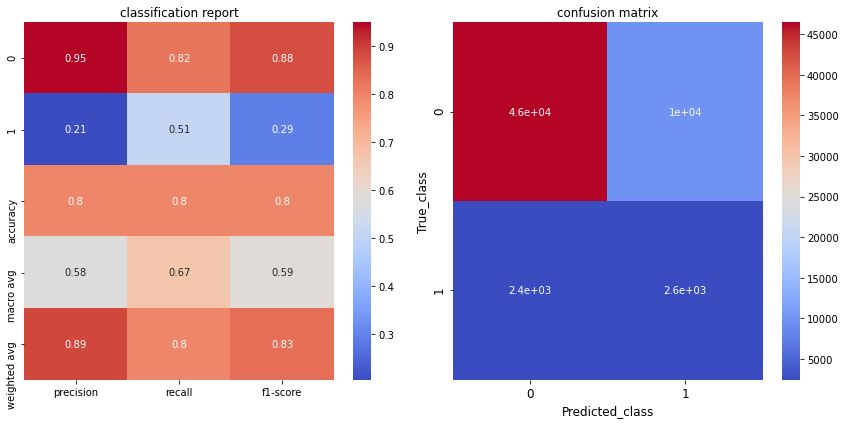

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report).transpose()

f,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.heatmap(report.drop('support',axis=1), annot=True, cmap="coolwarm", ax=ax1)
ax1.set_title('classification report')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm", ax=ax2)
ax2.tick_params(labelsize=12)
ax2.set_xlabel('Predicted_class', size=12)
ax2.set_ylabel('True_class', size=12)
ax2.set_title('confusion matrix')


plt.tight_layout()

plt.savefig('evaluation')
